### Final Project: The Crisis in African Elephant and Rhinoceros Populations

* **Principal Investigator** : John Brake
* **Email** : jfb395@nyu.edu

**Introduction**:

Megafauna like Elephants and Rhinoceroses have been inspiring zoologists and the general public alike for hundreds of year. They evoke wonder in anyone who looks upon them, and the groups' largely vegetarian existence gives them the allure of a gentle giant. However, Megafauna populations all over the world are under siege.  Recently, their plight was brought to the forefront of global consciousness following the press surrounding the last three Northern White Rhinoceros. There is great cause for concern. However, coinciding with these events, a breadth of tools for data analysis and visualization have come into existence, presenting an opportunity to present to the public the plight of African Elephants and the Rhinoceroses. 

This project aims to gather important publicly available data on the Loxodonta africana (African Elephant), Diceros bicornis (African Black Rhinoceros) and the Ceratotherium simum (African White Rhinoceros). This information will include their population classification over time, current population estimates for Elephants, current geographic locations, and population threats. This project will also synthesize information regarding some of the legislative actions taken to save these species from extinction. Through this data, this project hopes to illuminate the dire situation of these megafauna, and in doing so, inspire action to reverse the current trajectory. 

The project uses data from the [IUCN Redlist API](http://apiv3.iucnredlist.org/), the [CITES Species+ API](https://api.speciesplus.net/), the [Elephant Atlas](https://elephant-atlas.org/explore), and a recent report from the [Elephant Census](https://peerj.com/articles/2354/#supp-7). These sources provide data on (1) the population classification overtime (from least concern to extinct) (2) geographic distribution (3) export quotas (4) listings in protected species appendices and (5) current threats to these species. 

This project has 5 sections: 
* **Population Statistics**: International Union for Conservation of Nature (IUCN) population classification over time and specific population estimates from the Great Elephant Census (GEC) Report
* **Conservation Statistics**: Convention on International Trade in Endangered Species (CITES) Quotas and Listings in protected species appendicies over time
* **Threats**: Threats to these species as defined by the IUCN
* **Geography**: IUCN Black and White Rhino Country Occurences, Elephant Stratum Geography from Elephant Atlas
* **Conclusion**


**Requisite Packages**: Below I bring bring in the necessary packages

In [1]:
import requests #To get data from the API
from pprint import pprint #For the Data Report to show the data has been retrieved
import pandas as pd # For Data Analysis and Manipulation
import numpy as np # For performing numerical analysis
import matplotlib.pyplot as plt # Plotting

In [2]:
#These packages are necessary to plot polygons
from matplotlib.collections import PatchCollection
from shapely.geometry import Point, MultiPoint, MultiPolygon
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

### Part 1: Population Statistics

In [3]:
iucnkey = '2b3d0013bbe26c8ea04aece076127319d23670640e86b510173cf25cdb2c3c41'
#Obtaining IUCN Classifications for the African Elepant
resp = requests.get('http://apiv3.iucnredlist.org/api/v3/species/history/name/Loxodonta africana?token='
                    +iucnkey)
elephantclass=resp.json()
ele_df1 = pd.DataFrame(data=elephantclass)
ele_df2 = pd.DataFrame(data=elephantclass['result'])
frames=[ele_df1,ele_df2]
ele_df = pd.concat(frames,axis=1)
ele_df = ele_df.drop('result', axis=1)
#Converting the year column values from a string to an interger
Year=[]
for i in range(len(ele_df.year)):
    new=int(ele_df.year[i])
    Year.append(new)
ele_df['Year']=Year
ele_df=ele_df.drop('year',axis=1)

ele_df.index = ele_df.index + 1 # adding a row
ele_df.loc[7] = ['Loxodonta africana', 
                 "Less rare but believed to be threatened-requires watching", None,1965]  
ele_df = ele_df.sort_index()

In [4]:
#Obtaining IUCN Classifications for the African Black Rhino
resp2 = requests.get('http://apiv3.iucnredlist.org/api/v3/species/history/name/Diceros bicornis?token='+iucnkey)
blackrhinoclass=resp2.json()
blrhino_df1 = pd.DataFrame(data=blackrhinoclass)
blrhino_df2 = pd.DataFrame(data=blackrhinoclass['result'])
frames=[blrhino_df1,blrhino_df2]
blrhino_df = pd.concat(frames,axis=1)
blrhino_df = blrhino_df.drop('result', axis=1)
#Converting the year column values from a string to an interger
Year=[]
for i in range(len(blrhino_df.year)):
    new=int(blrhino_df.year[i])
    Year.append(new)
blrhino_df['Year']=Year
blrhino_df=blrhino_df.drop('year',axis=1)


In [6]:
#Obtaining IUCN Classifications for the African White Rhino
resp3 = requests.get('http://apiv3.iucnredlist.org/api/v3/species/history/name/Ceratotherium simum?token='+iucnkey)
whiterhinoclass=resp3.json()
whrhino_df1 = pd.DataFrame(data=whiterhinoclass)
whrhino_df2 = pd.DataFrame(data=whiterhinoclass['result'])
frames=[whrhino_df1,whrhino_df2]
whrhino_df = pd.concat(frames,axis=1)
whrhino_df = whrhino_df.drop('result', axis=1)
#Converting the year column values from a string to an interger
Year=[]
for i in range(len(whrhino_df.year)):
    new=int(whrhino_df.year[i])
    Year.append(new)
whrhino_df['Year']=Year
whrhino_df=whrhino_df.drop('year',axis=1)

In [7]:
#Combining the Elphant and Rhino DataFrames
newframes=[ele_df,blrhino_df,whrhino_df]
species_class_df=pd.concat(newframes)
species_class_df.reset_index(inplace=True)

In [8]:
#Creating Numerical Values for the Classifications to make graphing easier
code_dict={None:7,'LC':7,'LR/cd':7,'NT':6,'V':5,'VU':5,'EN':4,'E':4,'CR':3,'EW':2,'EX':1}
num_column=[]
for i in range(len(species_class_df.code)):    
    new=code_dict[species_class_df.code[i]]
    num_column.append(new)
species_class_df['Numerical Code']=num_column
species_class_df.reset_index(inplace=True)

In [9]:
species_class_df=species_class_df.drop('level_0',axis=1)

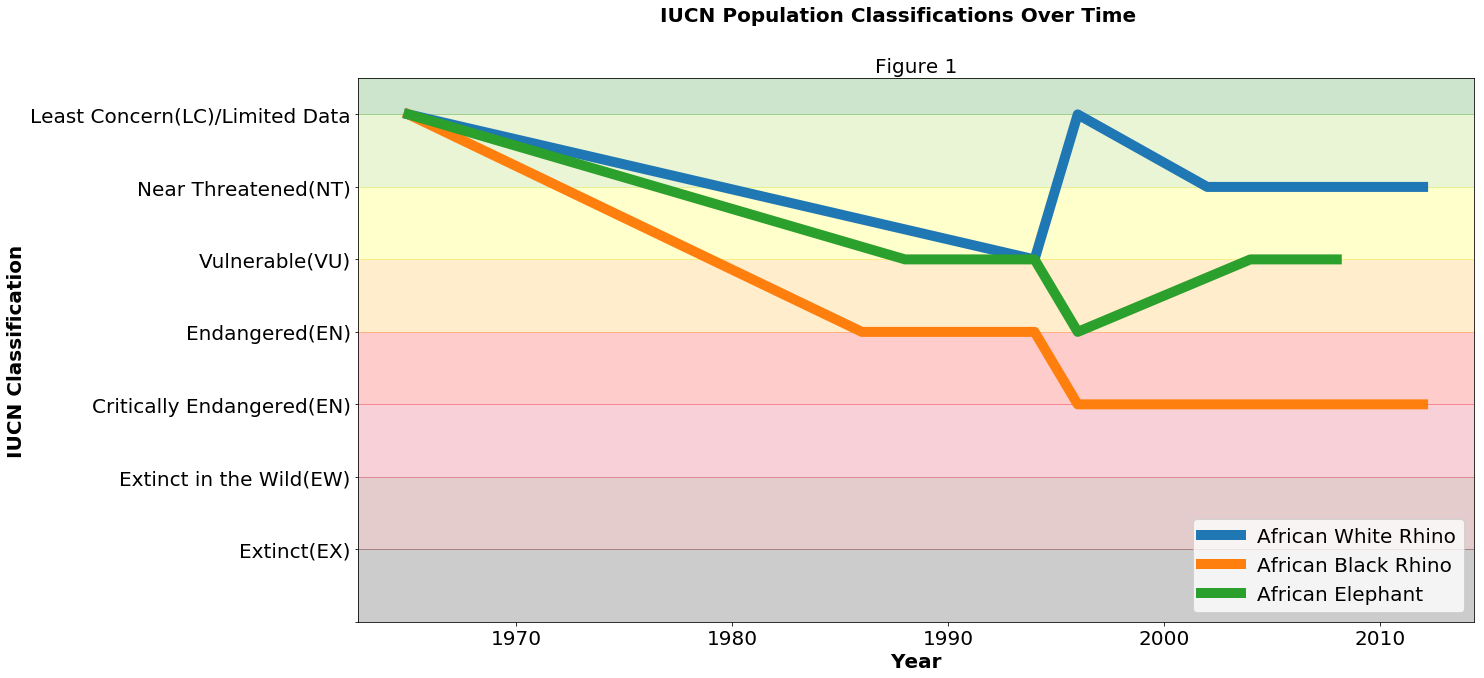

In [10]:
#Plotting the IUCN Population Classifications Overtime 
subset=species_class_df[['name','Year','Numerical Code']]
fig,ax=plt.subplots()
names=['African Elephant','African Black Rhino','African White Rhino']
subset.groupby('name').plot(x='Year',y='Numerical Code',ax=ax,figsize=(20,10),title='Figure 1',
                            legend=True,fontsize=20,lw=10.0)
ax.legend(('African White Rhino','African Black Rhino','African Elephant'),loc=4,fontsize=20)
fig.suptitle('IUCN Population Classifications Over Time', fontsize=20, fontweight='bold')
ax.set_title('Figure 1',fontsize=20)
ax.set_ylabel('IUCN Classification',fontweight='bold',fontsize=20)
ax.set_xlabel('Year',fontweight='bold',fontsize=20)
labels=['','Extinct(EX)','Extinct in the Wild(EW)','Critically Endangered(EN)',
        'Endangered(EN)','Vulnerable(VU)','Near Threatened(NT)','Least Concern(LC)/Limited Data']
plt.ylim(ymax=7.5,ymin=1.0)
plt.yticks(np.arange(0,7.5,1),labels)
#Creating the Green to Red Scale background for the graph
plt.axhspan(0,1.0,alpha=0.2,color='black')
plt.axhspan(1.0,2.0,alpha=0.2,color='maroon')
plt.axhspan(2.0,3.0,alpha=0.2,color='crimson')
plt.axhspan(3.0,4.0,alpha=0.2,color='red')
plt.axhspan(4.0,5.0,alpha=0.2,color='orange')
plt.axhspan(5.0,6.0,alpha=0.2,color='yellow')
plt.axhspan(6.0,7.0,alpha=0.2,color='yellowgreen')
plt.axhspan(7.0,7.5,alpha=0.2,color='green')
plt.show()

As can be observed from Figure 1, according to the IUCN Red List, all these species have seen downgrading in classification over the time period described. Specifically, the African Black Rhino has seen massive declines over this time period reaching critically endangered levels. 

In [11]:
#Read in the Great Elephant Census (GEC) Trend Excel File
url="https://dfzljdn9uc3pi.cloudfront.net/2016/2354/1/GEC_trend_data.xlsx"
df = pd.read_excel(url)
new_df=pd.DataFrame(df.groupby(['Year','Country']).Estimate.sum())
new_df.reset_index(inplace=True)
count=new_df.groupby("Country").describe()
count.reset_index(inplace=True)
labels=[]
for i in range(len(count['Country'])):
    label=count['Country'][i]
    labels.append(label)


In [14]:
#Obtaining summary statistics for country data
country_data=new_df.groupby("Country").Estimate.describe()
#sorting values and displaying them in descedning order
country_data.sort_values(by=['mean','std'],ascending=False)


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Botswana,14.0,99005.714286,61211.093135,863.0,83749.00,109450.5,128195.75,202883.0
Tanzania,13.0,38318.000000,44702.524636,1890.0,3421.00,11601.0,64844.00,133706.0
Zimbabwe,16.0,29051.750000,30746.645388,0.0,342.25,12370.5,51499.75,87641.0
South Africa,20.0,11063.700000,3735.551747,344.0,8744.50,11578.5,13254.25,17086.0
Kenya,10.0,9346.600000,7906.091241,970.0,5165.75,7516.5,10196.00,29193.0
Zambia,13.0,7540.153846,6159.766214,899.0,3750.00,4582.0,10975.00,21608.0
Mozambique,16.0,6826.812500,6523.291390,137.0,520.00,5759.5,12503.75,20364.0
W. Africa,2.0,6751.500000,3053.994188,4592.0,5671.75,6751.5,7831.25,8911.0
Uganda,12.0,2287.083333,1527.049172,250.0,1310.50,2120.5,3070.75,5075.0


Over the time period described, the mean population is greatest in Botswana and lowest in Mali. 

In [17]:
#creating a dataframe for the growth rates
growth_df=new_df.sort_values(["Country","Year"])
growth_df["growthrate"]=new_df.groupby("Country").Estimate.pct_change()
growth_df=growth_df.dropna()


In [18]:
growth_df.sort_values(by="growthrate",ascending=False).head()

,Year,Country,Estimate,growthrate
100,2009,Zimbabwe,9123,inf
75,2006,Zimbabwe,14590,728.500000
36,2001,Zimbabwe,87641,385.083700
31,2001,Botswana,128710,144.435028
101,2010,Botswana,125306,111.584007


The highest growth rates of estimated popualtion were in Zimbabwe in 2006

In [19]:
growth_df.sort_values(by="growthrate",ascending=False).tail()

,Year,Country,Estimate,growthrate
25,2000,Botswana,885,-0.992213
76,2007,Botswana,863,-0.994487
30,2000,Zimbabwe,227,-0.996137
58,2004,Zimbabwe,20,-0.999772
93,2008,Zimbabwe,0,-1.000000


The lowest growth rates in Zimbabwe were in Zimbabwe in 2008, this corresponded to a massive increase in poaching in the country. 

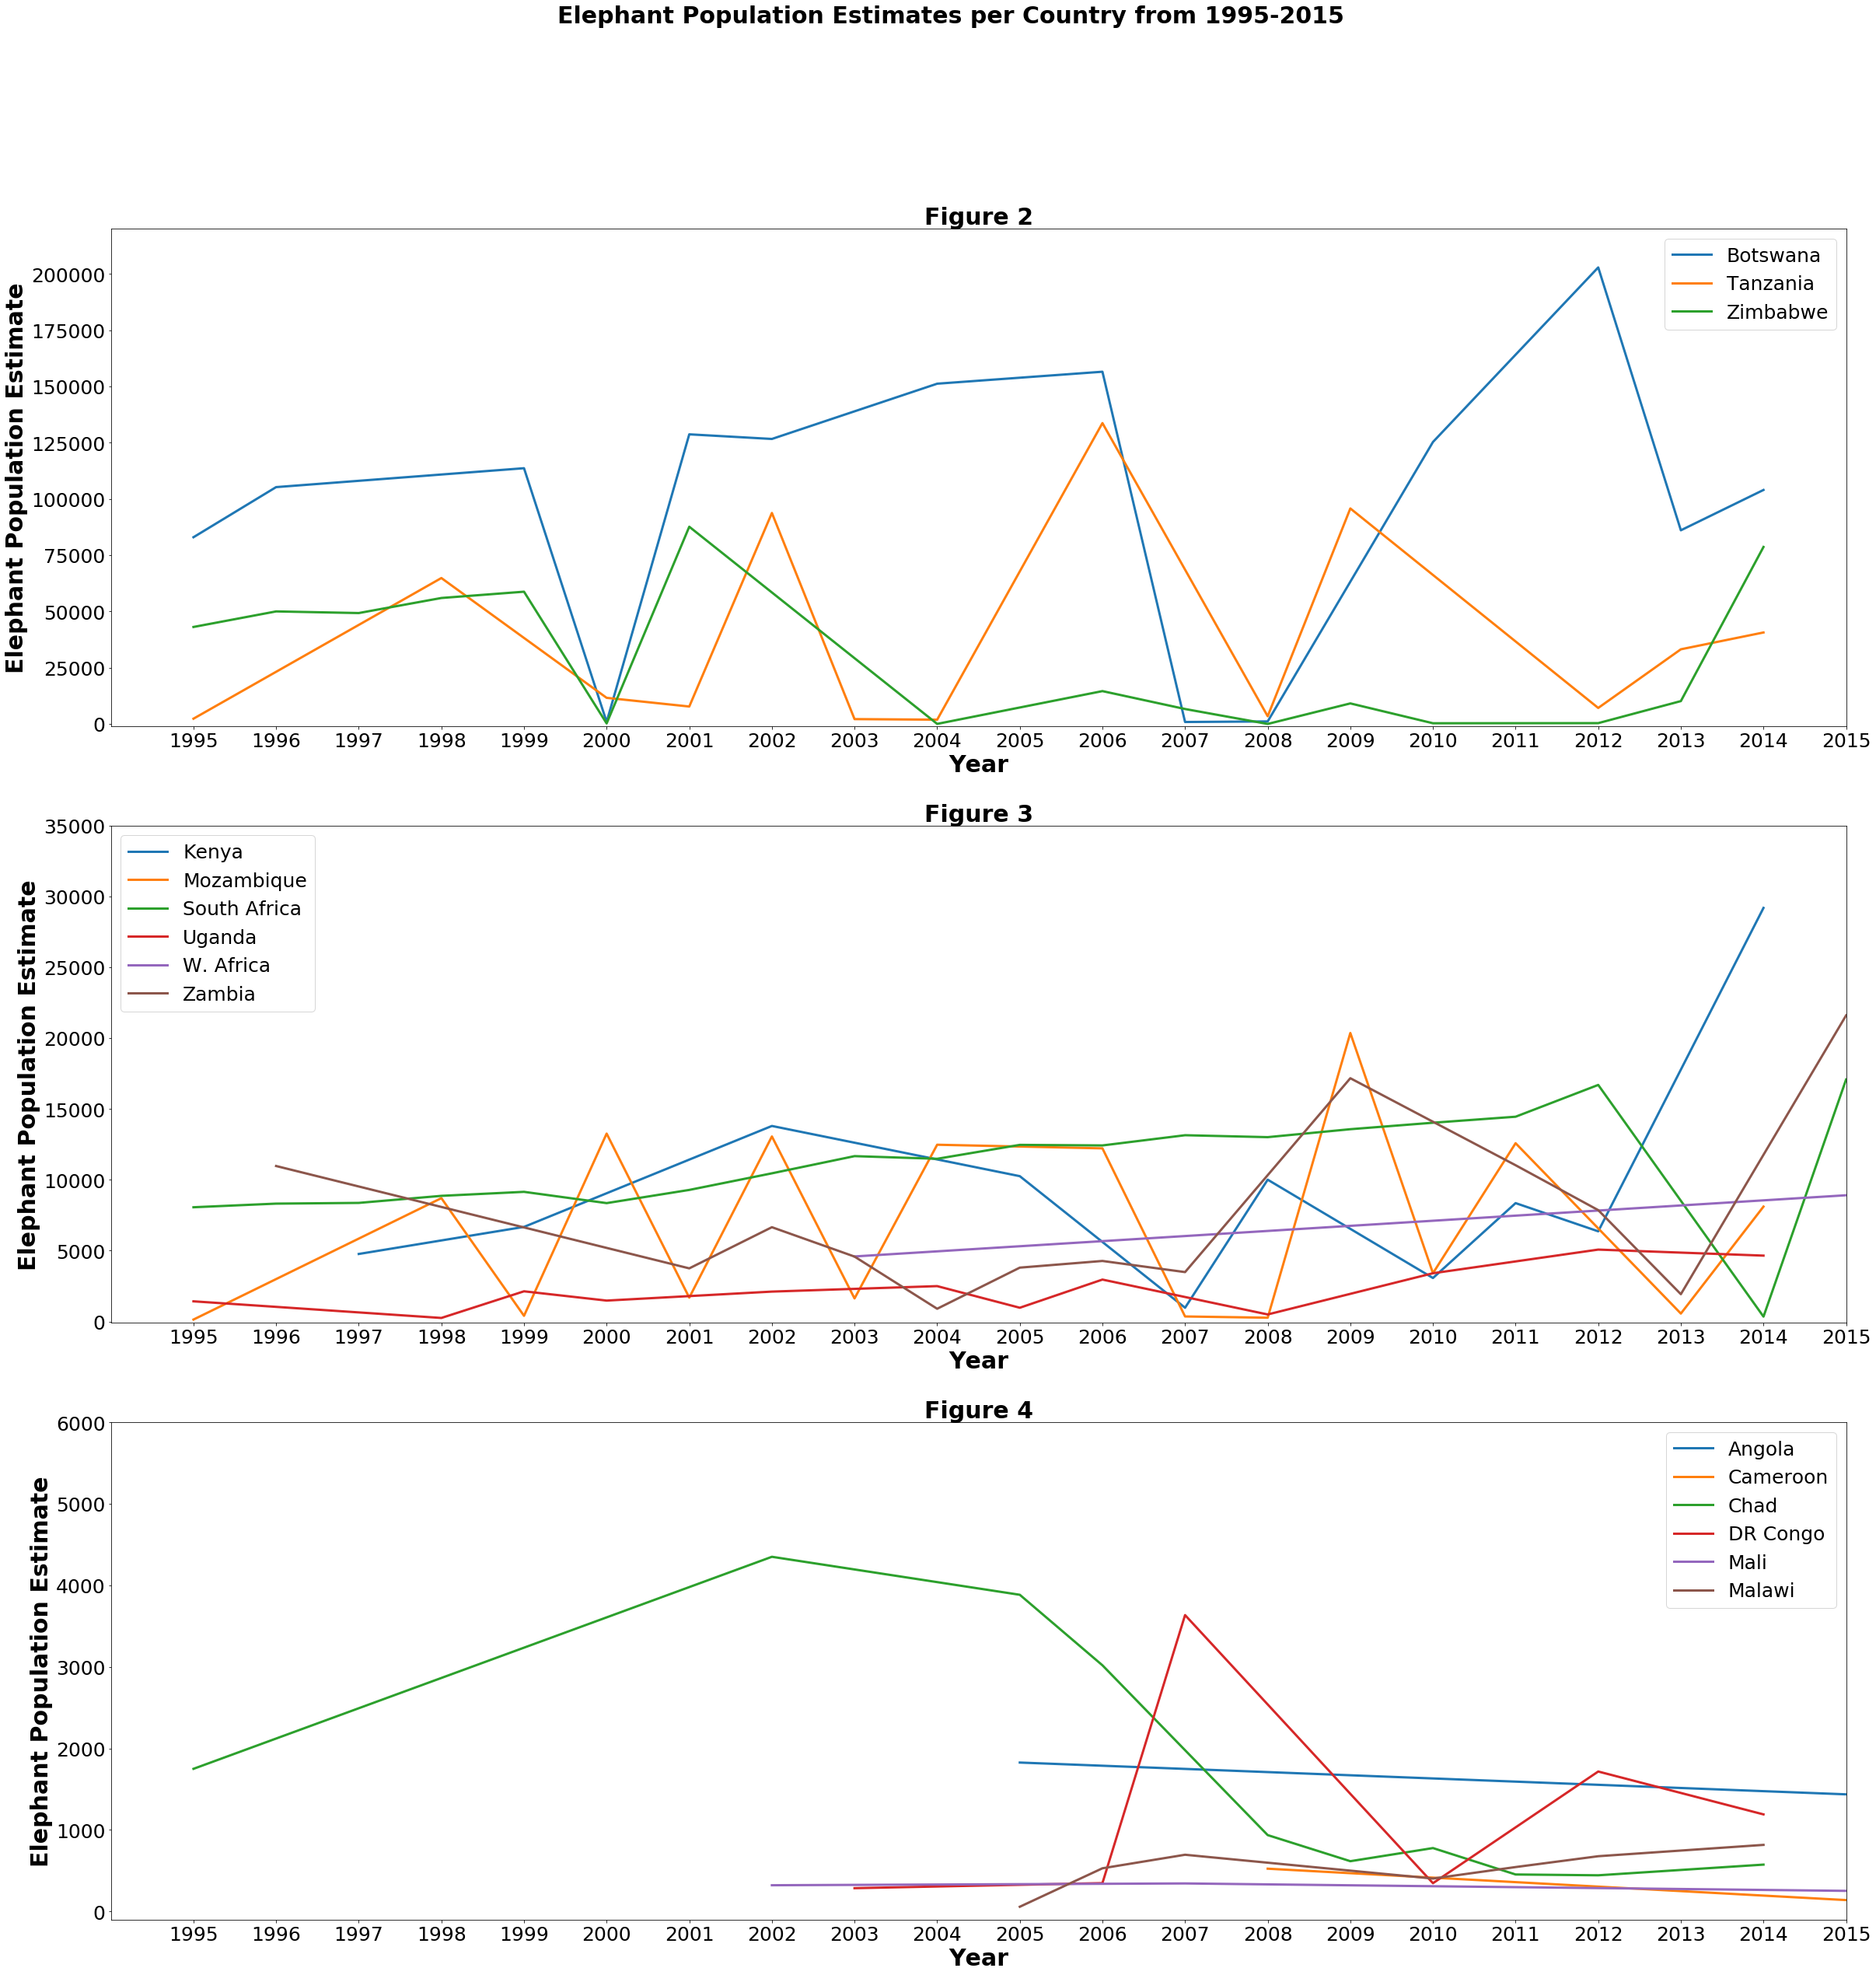

In [20]:
#Plot the Countries Elephant Populations Over Time Divided into 3 Figures of countries with
#similar populations
fig,(ax1,ax2,ax3)=plt.subplots(nrows=3, ncols=1)
fig.suptitle("Elephant Population Estimates per Country from 1995-2015",fontsize=30, fontweight='bold')
labels1=['Botswana','Tanzania','Zimbabwe']

for item in labels1:
    new_df[new_df['Country']==item].plot(x='Year',y='Estimate',ax=ax1,legend=True,
                                         figsize=(40,40),lw=3.0)
ax1.set_title("Figure 2",fontsize=30, fontweight='bold')
ax1.legend(labels1,fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax1.set_xlabel('Year',fontsize=30,fontweight='bold')
ax1.set_ylabel('Elephant Population Estimate',fontsize=30,fontweight='bold')
ax1.set_ylim(-1000,220000)
ax1.set_xlim(1994,2015)
ax1.set_xticks(np.arange(1995,2016,1))

labels2=['Kenya','Mozambique','South Africa','Uganda','W. Africa','Zambia']
for item in labels2:
    new_df[new_df['Country']==item].plot(x='Year',y='Estimate',ax=ax2,legend=True,
                                         figsize=(40,40),lw=3.0)
ax2.set_title("Figure 3",fontsize=30, fontweight='bold')
ax2.legend(labels2,fontsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
ax2.set_xlabel('Year',fontsize=30,fontweight='bold')
ax2.set_ylabel('Elephant Population Estimate',fontsize=30,fontweight='bold')
ax2.set_ylim(-100,35000)
ax2.set_xlim(1994,2015)
ax2.set_xticks(np.arange(1995,2016,1))

labels3=['Angola','Cameroon','Chad','DR Congo','Mali','Malawi']
for item in labels3:
    new_df[new_df['Country']==item].plot(x='Year',y='Estimate',ax=ax3,legend=True,
                                         figsize=(40,40),lw=3.0)
ax3.set_title("Figure 4",fontsize=30, fontweight='bold')
ax3.legend(labels3,fontsize=25)
ax3.tick_params(axis='both', which='major', labelsize=25)
ax3.set_xlabel('Year',fontsize=30,fontweight='bold')
ax3.set_ylabel('Elephant Population Estimate',fontsize=30,fontweight='bold')
ax3.set_ylim(-100,6000)
ax3.set_xlim(1994,2015)
ax3.set_xticks(np.arange(1995,2016,1))
plt.show()

Because gathering information about these migratory animals, despite their size, is quite challenging, The Great Elephant Census (GEC) utilizes its own statistical methodology for estimating elephant populations, which are described in greater detail in the [GEC's 2016 paper](https://peerj.com/articles/2354/). By the GEC's estimatates, many countries are observing sharp declines in Elephant populations over the observed time period. 

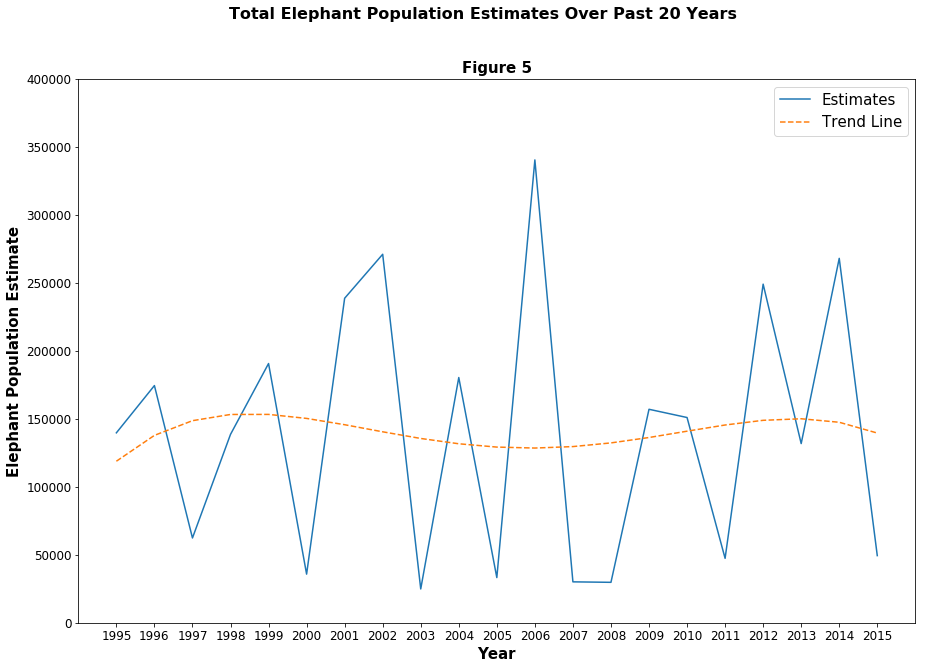

In [22]:
#plotting the yearly data estimates with a trend line
yearly_data=new_df.groupby('Year').sum()
yearly_data.values
x=np.arange(1995,2016)
z=np.polyfit(x,yearly_data.values,4)
coef=[]
for i in range(len(z)):
    coef.append(float(z[i]))
myarray=np.asarray(coef)
p=np.poly1d(myarray)
#Plotting the Total Elephant Population Over Time
fig,ax=plt.subplots()
plt.plot(yearly_data.index,yearly_data.values,label="Estimates")
plt.plot(x,p(x),label="Trend Line",ls="--")
plt.rcParams["figure.figsize"] = (15,10)
plt.ylim(0,400000)
plt.xticks(np.arange(1995,2016,1))
plt.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlabel('Year',fontsize=15)
fig.suptitle("Total Elephant Population Estimates Over Past 20 Years"
             ,fontsize=16, fontweight='bold')
ax.set_title("Figure 5",fontsize=15, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel('Year',fontsize=15,fontweight='bold')
ax.set_ylabel('Elephant Population Estimate',fontsize=15,fontweight='bold')

plt.legend(fontsize=15)
plt.show()

This figure plots the how the total population estimates of the African Elephant has changed over time, as reported by the GEC, has changed over time. One can note that the populations have declined from 1995-2015. It is worth noting that obtaining an accurate count of the animals is challenging given that a significant number of these animals are forest dwelling and therefore unobservable from the heights of an aerial survey(the primary method of counting elephants).

### Part 2: Conservation Legislation

In [23]:
#Utilizing the CITES Species + API to obtain legislative data
citeskey = 'sUUmst7B5mLG6hUxQ20wGQtt'
response2 = requests.get('https://api.speciesplus.net/api/v1/taxon_concepts?name=Loxodonta africana',
                         headers={'X-Authentication-Token': citeskey})
json_raw2=response2.json()
elid=str(json_raw2['taxon_concepts'][0]['id']) #storing Elephant Cites ID 
response3 = requests.get('https://api.speciesplus.net/api/v1/taxon_concepts?name=Diceros bicornis', 
                         headers={'X-Authentication-Token': citeskey})
json_raw3=response3.json()
blrhinoid=str(json_raw3['taxon_concepts'][0]['id']) #storing Black Rhino Cites ID 
response4 = requests.get('https://api.speciesplus.net/api/v1/taxon_concepts?name=Ceratotherium simum', 
                         headers={'X-Authentication-Token': citeskey})
json_raw4=response4.json()
whrhinoid=str(json_raw4['taxon_concepts'][0]['id']) #storing White Rhino Cites ID 
#Create a Dictionary of Cites IDs and Species Common Name
speciesid_list=[elid,blrhinoid,whrhinoid]
speciesid_dict={int(elid):'African Elephant',int(blrhinoid):'African Black Rhino',
                int(whrhinoid):'African White Rhino'}


In [24]:
#Obtain the Legislative Data for Elephants and Rhinos
r=requests.get('https://api.speciesplus.net/api/v1/taxon_concepts/'+elid+'/cites_legislation?scope=all', 
               headers={'X-Authentication-Token': citeskey})
elephant_legislation_raw=r.json()
r2=requests.get('https://api.speciesplus.net/api/v1/taxon_concepts/'+blrhinoid+'/cites_legislation?scope=all', 
                headers={'X-Authentication-Token': citeskey})
blackrhino_legislation_raw=r2.json()
r3=requests.get('https://api.speciesplus.net/api/v1/taxon_concepts/'+whrhinoid+'/cites_legislation?scope=all', 
                headers={'X-Authentication-Token': citeskey})
whiterhino_legislation_raw=r3.json()



In [25]:
# Creating a DataFrame for African Elephant Cites Quotas
pd.set_option('display.max_colwidth', -1)#unlimited character width
ele_quota_df1=pd.DataFrame(data=elephant_legislation_raw['cites_quotas'])
total=len(elephant_legislation_raw['cites_quotas'])
cites_countrylist=[]
for i in range(total):
    a=elephant_legislation_raw['cites_quotas'][i]['geo_entity']['name']
    cites_countrylist.append(a)
ele_quota_df1['country']=cites_countrylist
ele_quota_df=ele_quota_df1
ele_quota_df=ele_quota_df.drop('geo_entity', axis=1)
#create a column of common names utilizing the dictionary that was created
#earlier
name_column=[]
for i in range(len(ele_quota_df.taxon_concept_id)):    
    new=speciesid_dict[ele_quota_df.taxon_concept_id[i]]
    name_column.append(new)
ele_quota_df['name']=name_column
#Create a year column for plotting/analysis
year_column=[]
for i in range(len(ele_quota_df.publication_date)):    
    if type(ele_quota_df.publication_date[i])!=type(None):
        new=int(ele_quota_df.publication_date[i][0:4])
        year_column.append(new)
    else:
        year_column.append(None)
ele_quota_df['year']=year_column
ele_quota_df['year'] = ele_quota_df['year'].fillna(0.0).astype(int)

In [26]:
# Creating a DataFrame for African Black Rhino Cites Quotas
blrhino_quota_df1=pd.DataFrame(data=blackrhino_legislation_raw['cites_quotas'])
total=len(blackrhino_legislation_raw['cites_quotas'])
cites_countrylist=[]
for i in range(total):
    a=blackrhino_legislation_raw['cites_quotas'][i]['geo_entity']['name']
    cites_countrylist.append(a)
blrhino_quota_df1['country']=cites_countrylist
blrhino_quota_df=blrhino_quota_df1
blrhino_quota_df=blrhino_quota_df.drop('geo_entity', axis=1)
#create a column of common names utilizing the dictionary that was created
#earlier
name_column=[]
for i in range(len(blrhino_quota_df.taxon_concept_id)):    
    new=speciesid_dict[blrhino_quota_df.taxon_concept_id[i]]
    name_column.append(new)
blrhino_quota_df['name']=name_column
#Create a year column for plotting/analysis
year_column=[]
for i in range(len(blrhino_quota_df.publication_date)):    
    if type(blrhino_quota_df.publication_date[i])!=type(None):
        new=int(blrhino_quota_df.publication_date[i][0:4])
        year_column.append(new)
    else:
        year_column.append(None)
blrhino_quota_df['year']=year_column
blrhino_quota_df['year'] = blrhino_quota_df['year'].fillna(0.0).astype(int)
#No Cites Quotas exist for the White Elephant

In [27]:
#Combining the Elephant Quota and the Black Rhino Quota DataFrames
newframes1=[ele_quota_df,blrhino_quota_df]
species_quota_df=pd.concat(newframes1)
sub_species_df=species_quota_df[['country','name','year','quota']]
sub_species_df1=sub_species_df[sub_species_df["year"]!=0]
sub_species_df1=sub_species_df1[sub_species_df1["quota"]!=0.0]
sub_species_df1.sort_values(by=["country","year"])
sub_species_df1=sub_species_df1.drop_duplicates(keep='first', inplace=False)

In [28]:
#Creating a new dataframe from the previously created combined Dataframe
#grouping the data by name of species followed by either the year or the country
#then taking either the mean or sum of the quota 
#reporting this data in descending order below
sum_year_df=pd.DataFrame(data=sub_species_df1.groupby(['name','year']).quota.sum())
mean_year_df=pd.DataFrame(data=sub_species_df1.groupby(['name','year']).quota.mean())
sum_country_df=pd.DataFrame(data=sub_species_df1.groupby(['name','country']).quota.sum())
mean_country_df=pd.DataFrame(data=sub_species_df1.groupby(['name','country']).quota.mean())


In [29]:
#total quota summed across countries over time
sum_year_df.sort_values(by="quota",ascending=False)

quota
name                year        
African Elephant    2009  3600.0
                    2007  3260.0
                    2014  3240.0
                    2012  3200.0
                    2011  3200.0
                    2010  3080.0
                    2016  3056.0
                    2013  2860.0
                    2006  2550.0
                    2005  2530.0
                    2004  2320.0
                    2015  2300.0
                    2017  2194.0
                    2002  1920.0
                    2003  1220.0
                    2008  660.0 
                    2018  580.0 
African Black Rhino 2006  10.0  
                    2017  10.0  
                    2016  10.0  
                    2015  10.0  
                    2014  10.0  
                    2013  10.0  
                    2012  10.0  
                    2011  10.0  
                    2010  10.0  
                    2009  10.0  
                    2007  10.0  
                    2005  10.0  
                    2018  5.0

The highest quota for Elephant trophies was in the year 2009, with the African Black Rhino not having any variability in the quota size over time. The African White Rhino does not have any CITES export quotas at the time of this report. 

In [30]:
#mean quota across countries over time 
mean_year_df.sort_values(by="quota",ascending=False)

quota
name                year            
African Elephant    2008  660.000000
                    2013  476.666667
                    2014  405.000000
                    2012  400.000000
                    2011  400.000000
                    2010  385.000000
                    2016  382.000000
                    2009  360.000000
                    2007  326.000000
                    2006  283.333333
                    2004  257.777778
                    2015  255.555556
                    2005  253.000000
                    2017  243.777778
                    2002  240.000000
                    2018  193.333333
                    2003  174.285714
African Black Rhino 2006  5.000000  
                    2018  5.000000  
                    2017  5.000000  
                    2016  5.000000  
                    2015  5.000000  
                    2014  5.000000  
                    2013  5.000000  
                    2012  5.000000  
                    2011  5.000000  
                    2010  5.000000  
                    2009  5.000000  
                    2007  5.000000  
                    2005  5.000000

The mean quota was highest in 2008 for the African Elephant, while the mean quota for the African Black Rhino has not changed over the observed period.

In [31]:
#total quota summed across time per country
sum_country_df.sort_values(by="quota",ascending=False)

quota
name                country                             
African Elephant    Zimbabwe                     13800.0
                    Botswana                     9280.0 
                    United Republic of Tanzania  4700.0 
                    South Africa                 4060.0 
                    Namibia                      2610.0 
                    Cameroon                     2320.0 
                    Gabon                        1950.0 
                    Mozambique                   1930.0 
                    Zambia                       1120.0 
African Black Rhino Namibia                      65.0   
                    South Africa                 60.0

The highest export CITES quotas exist in Zimbabwe followed by Botswana, this makes sense given that these countries have the highest elephant populations and the largest game preserves.

In [32]:
#mean quota across time per country
mean_country_df.sort_values(by="quota",ascending=False)

quota
name                country                                
African Elephant    Zimbabwe                     985.714286
                    Botswana                     662.857143
                    United Republic of Tanzania  261.111111
                    South Africa                 238.823529
                    Gabon                        216.666667
                    Namibia                      174.000000
                    Cameroon                     154.666667
                    Mozambique                   113.529412
                    Zambia                       93.333333 
African Black Rhino Namibia                      5.000000  
                    South Africa                 5.000000

The mean quota shows the same story as the total quota above.

In [33]:
#resetting the index to make plotting easier
sum_year_df.reset_index(inplace=True)

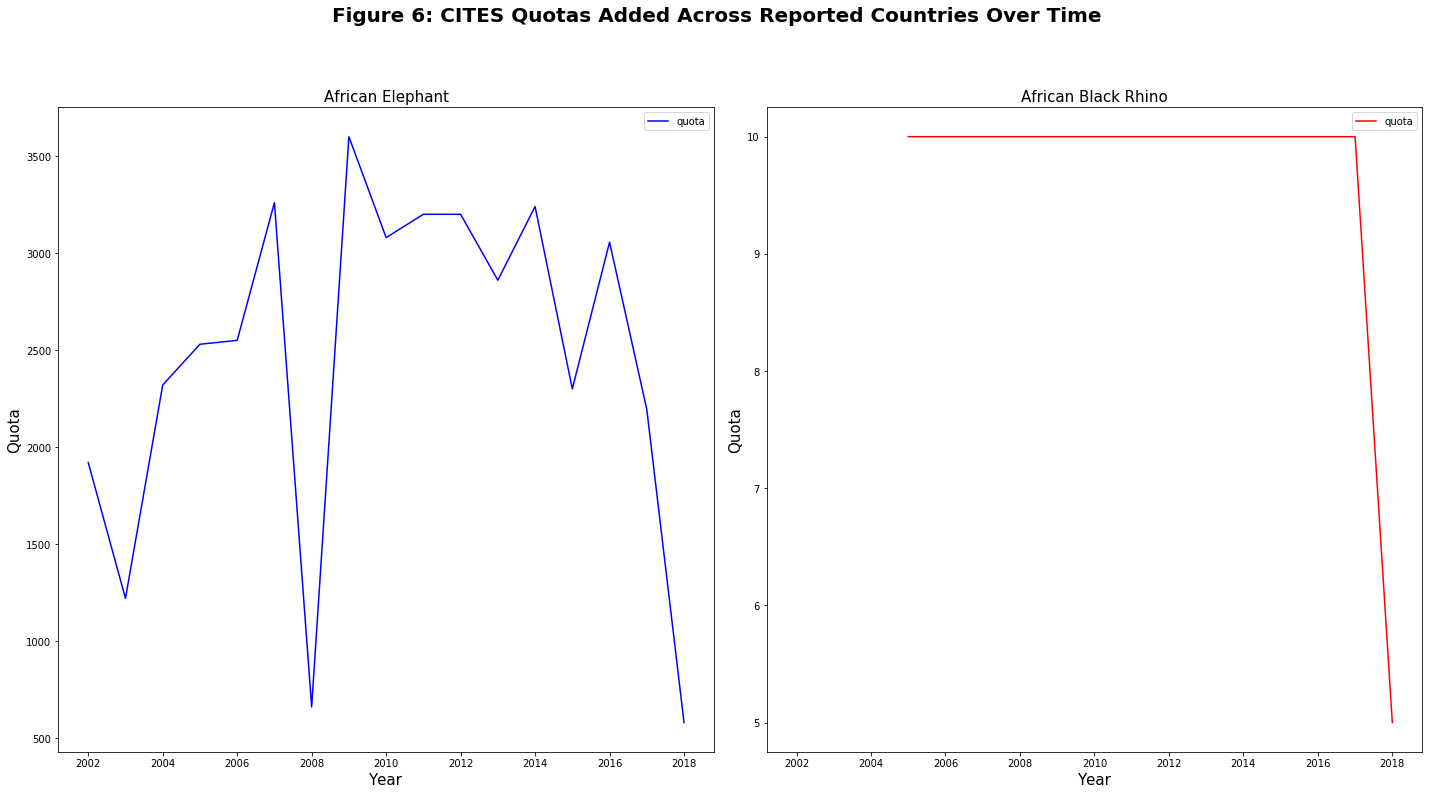

In [34]:

#plotting total quotas by year over time

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharex=True,figsize=(20,10))
sum_year_df[sum_year_df['name']=="African Elephant"].plot(x='year',y='quota',ax=ax1,color="blue")
ax1.set_title("African Elephant",fontsize=15)
sum_year_df[sum_year_df['name']=="African Black Rhino"].plot(x='year',y='quota',ax=ax2,color='red')
ax2.set_title("African Black Rhino",fontsize=15)
fig.suptitle("Figure 6: CITES Quotas Added Across Reported Countries Over Time",y=1.1,fontweight="bold",fontsize=20)
ax1.set_ylabel("Quota",fontsize=15)
ax2.set_ylabel("Quota",fontsize=15)
ax1.set_xlabel("Year",fontsize=15)
ax2.set_xlabel("Year",fontsize=15)
plt.tight_layout()
plt.show()



In Figure 6 we observe how the aggregate CITES export quotas for Elephants and Black Rhinos have changed over time. These CITES quotas refer to the invory tusks as hunting trophies that can be exported from the country. We can see the that Black Rhino quotas have remained relatively the same throughout history, while the Elephant quotes are much more variable. This variability is attributed to the fact that each country that has signed onto CITES is able to, within limits set by the CITES convention, set their own quotas. In other words, as long as these quotas are not damaging to species longevity as determined by the convention's scientific authority, countries can derermine their own export quotas and report said exports to CITES authorties. It is heartening to see that the quotas have decreased significantly since their 2008 peak, highlighting a renewed desire by governments in conserving these animals. 

In [35]:
# Creating a DataFrame for African Elephant Cites Listing
ele_list_df1=pd.DataFrame(data=elephant_legislation_raw['cites_listings'])
total=len(elephant_legislation_raw['cites_listings'])
cites_countrylist=[]
for i in range(total):
    if 'party'in elephant_legislation_raw['cites_listings'][i].keys():
        a=elephant_legislation_raw['cites_listings'][i]['party']['name']
        cites_countrylist.append(a)
    else:
        cites_countrylist.append('')
ele_list_df2=pd.DataFrame(data=cites_countrylist)
frames10=[ele_list_df1,ele_list_df2]
ele_list_df=pd.concat(frames10,axis=1)
ele_list_df=ele_list_df.drop('party', axis=1)
#create a column of common names utilizing the dictionary that was created
#earlier
name_column=[]
for i in range(len(ele_list_df.taxon_concept_id)):    
    new=speciesid_dict[ele_list_df.taxon_concept_id[i]]
    name_column.append(new)
ele_list_df['name']=name_column
#Create a year column for easier plotting
year_column=[]
for i in range(len(ele_list_df.effective_at)):    
    new=int(ele_list_df.effective_at[i][0:4])
    year_column.append(new)
ele_list_df['year']=year_column


In [36]:
# Creating a DataFrame for African Black Rhino Cites Listing
blrhino_list_df1=pd.DataFrame(data=blackrhino_legislation_raw['cites_listings'])
total=len(blackrhino_legislation_raw['cites_listings'])
cites_countrylist=[]
for i in range(total):
    if 'party'in blackrhino_legislation_raw['cites_listings'][i].keys():
        a=blackrhino_legislation_raw['cites_listings'][i]['party']['name']
        cites_countrylist.append(a)
    else:
        cites_countrylist.append('')
blrhino_list_df2=pd.DataFrame(data=cites_countrylist)
frames10=[blrhino_list_df1,blrhino_list_df2]
blrhino_list_df=pd.concat(frames10,axis=1)
#Create a column of common names utilizing the previously created 
#dictionary
name_column=[]
for i in range(len(blrhino_list_df.taxon_concept_id)):    
    new=speciesid_dict[blrhino_list_df.taxon_concept_id[i]]
    name_column.append(new)
blrhino_list_df['name']=name_column
#Create a year column for easier plotting
year_column=[]
for i in range(len(blrhino_list_df.effective_at)):    
    new=int(blrhino_list_df.effective_at[i][0:4])
    year_column.append(new)
blrhino_list_df['year']=year_column

In [37]:
# Creating a DataFrame for African White Rhino Cites Listing
whrhino_list_df1=pd.DataFrame(data=whiterhino_legislation_raw['cites_listings'])
total=len(whiterhino_legislation_raw['cites_listings'])
cites_countrylist=[]
for i in range(total):
    if 'party'in whiterhino_legislation_raw['cites_listings'][i].keys():
        a=whiterhino_legislation_raw['cites_listings'][i]['party']['name']
        cites_countrylist.append(a)
    else:
        cites_countrylist.append('')
whrhino_list_df2=pd.DataFrame(data=cites_countrylist)
frames10=[whrhino_list_df1,whrhino_list_df2]
whrhino_list_df=pd.concat(frames10,axis=1)
#blrhino_list_df=ele_list_df.drop('party', axis=1)
#Create a column of common names utilizing the previously created 
#dictionary
name_column=[]
for i in range(len(whrhino_list_df.taxon_concept_id)):    
    new=speciesid_dict[whrhino_list_df.taxon_concept_id[i]]
    name_column.append(new)
whrhino_list_df['name']=name_column
#Create a year column for easier plotting
year_column=[]
for i in range(len(whrhino_list_df.effective_at)):    
    new=int(whrhino_list_df.effective_at[i][0:4])
    year_column.append(new)
whrhino_list_df['year']=year_column



In [38]:
#Creating a combined DataFrame for these listings
newframes1=[ele_list_df,blrhino_list_df,whrhino_list_df]
species_list_df=pd.concat(newframes1)
species_list_df.rename(columns={0: 'country'}, inplace=True)
listing_subset=species_list_df[['name','year','country','annotation','appendix']]
name_list=[]
for item in speciesid_dict.values():
    name_list.append(item)
listing_subset=listing_subset.set_index('name')
listing_total=len(listing_subset['year'])

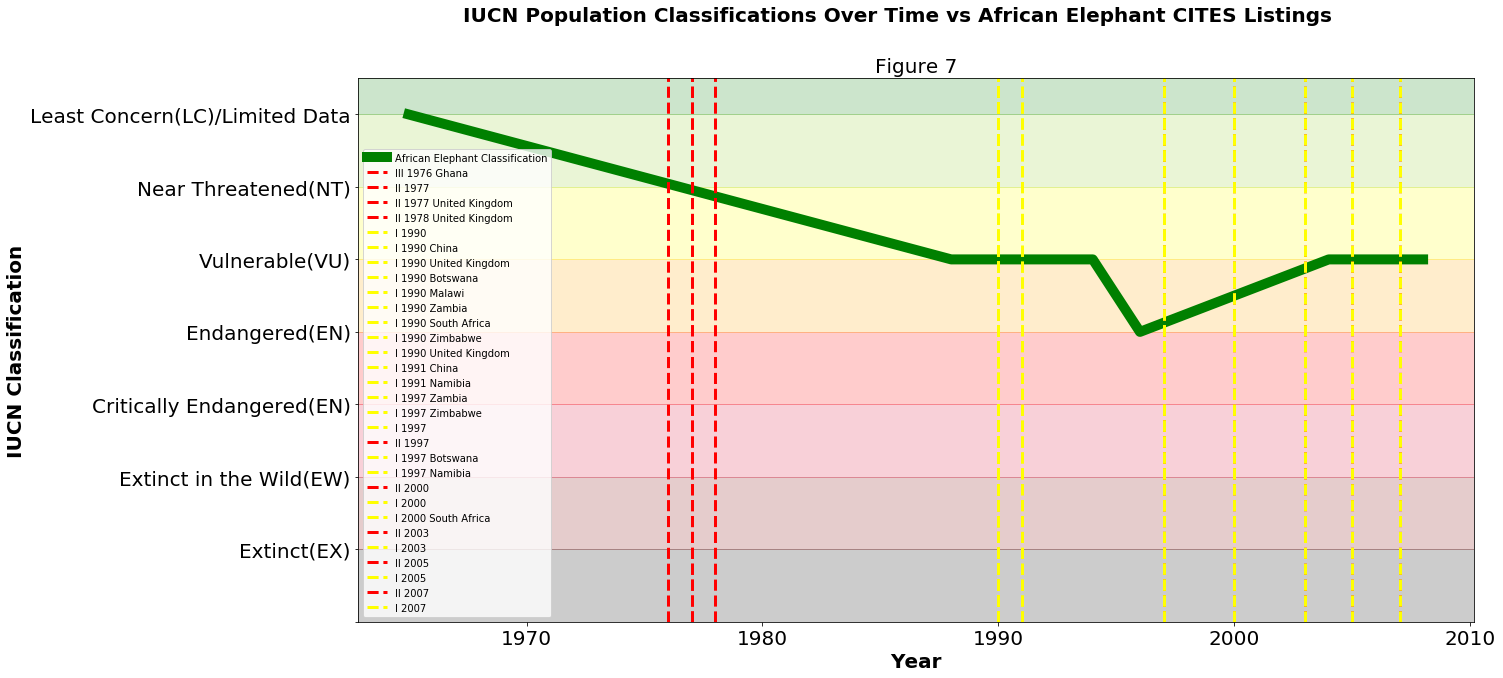

In [39]:
#Plotting the ICUN Population Classifications Overtime 
subset=species_class_df[['name','Year','Numerical Code']]
fig,ax=plt.subplots()
names=['African Elephant','African Black Rhino','African White Rhino']
subset[subset['name']=='Loxodonta africana'].plot(x='Year',y='Numerical Code',ax=ax,figsize=(20,10),
                            title='Figure 1',legend=True,fontsize=20,lw=10.0,color='green',label="African Elephant Classification")


#ax.legend(('African White Rhino','African Black Rhino','African Elephant'),loc=4,fontsize=20)
fig.suptitle('IUCN Population Classifications Over Time vs African Elephant CITES Listings',
             fontsize=20, fontweight='bold')
ax.set_title('Figure 7',fontsize=20)
ax.set_ylabel('IUCN Classification',fontweight='bold',fontsize=20)
ax.set_xlabel('Year',fontweight='bold',fontsize=20)
labels=['','Extinct(EX)','Extinct in the Wild(EW)','Critically Endangered(EN)',
        'Endangered(EN)','Vulnerable(VU)','Near Threatened(NT)','Least Concern(LC)/Limited Data']
plt.ylim(ymax=7.5,ymin=1.0)
plt.yticks(np.arange(0,7.5,1),labels)
#Creating the Green to Red Scale background for the graph
plt.axhspan(0,1.0,alpha=0.2,color='black')
plt.axhspan(1.0,2.0,alpha=0.2,color='maroon')
plt.axhspan(2.0,3.0,alpha=0.2,color='crimson')
plt.axhspan(3.0,4.0,alpha=0.2,color='red')
plt.axhspan(4.0,5.0,alpha=0.2,color='orange')
plt.axhspan(5.0,6.0,alpha=0.2,color='yellow')
plt.axhspan(6.0,7.0,alpha=0.2,color='yellowgreen')
plt.axhspan(7.0,7.5,alpha=0.2,color='green')

#Plotting the Introduction of Elephants Cites Listings
for i in range(listing_total):
    if listing_subset.index[i]=='African Elephant':
        if str(listing_subset['appendix'][i]) == "I":
            ax=plt.axvline(x=listing_subset['year'][i], 
            ymin=0,ymax=10,color='yellow', linestyle='--',linewidth=3,
            label=(str(listing_subset['appendix'][i])+" "+(str(listing_subset['year'][i])+' '+str(listing_subset['country'][i])[0:14])))
        elif str(listing_subset['appendix'][i]) == "II" or "III":
            ax=plt.axvline(x=listing_subset['year'][i], 
            ymin=0,ymax=10,color='red', linestyle='--',linewidth=3,
            label=(str(listing_subset['appendix'][i])+" "+(str(listing_subset['year'][i])+' '+str(listing_subset['country'][i])[0:14])))
ax=plt.legend()
plt.show()

In Figure 7 we can see the negligible effect that multiple countries listing the African Elephant in the CITES Appendices had on the IUCN population classification. Species can be listed in one of three appendicies (I, II, III) in order of increasing threat to the species and each appendix affords increasing protections from over-exploitation. 

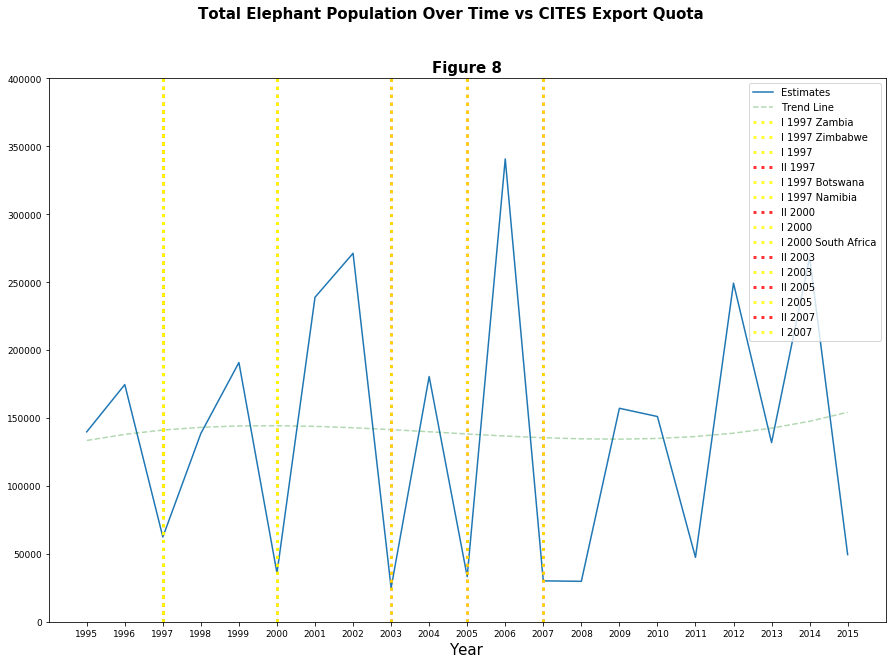

In [42]:
#plotting the yearly data estimates with a trend line
yearly_data=new_df.groupby('Year').sum()
yearly_data.values
x=np.arange(1995,2016)
z=np.polyfit(x,yearly_data.values,3)
coef=[]
for i in range(len(z)):
    coef.append(float(z[i]))
myarray=np.asarray(coef)
p=np.poly1d(myarray)
#Plotting the Total Elephant Population Over Time
fig,ax=plt.subplots()
plt.plot(yearly_data.index,yearly_data.values,label="Estimates",alpha=1)
plt.plot(x,p(x),label="Trend Line",ls="--",alpha=.3,color="green")
plt.rcParams["figure.figsize"] = (15,10)
plt.ylim(0,400000)
#plt.tick_params(axis='both', which='major', labelsize=5)
plt.xticks(np.arange(1995,2016,1))
for i in range(listing_total): #Plot the Cites Listings
    if listing_subset.index[i]=='African Elephant':
        if listing_subset['year'][i]>=1995:
                if listing_subset.index[i]=='African Elephant':
                    if str(listing_subset['appendix'][i]) == "I":
                        ax=plt.axvline(x=listing_subset['year'][i], 
                        ymin=0,ymax=10,color='yellow', linestyle=':',linewidth=3,alpha=.8,
                        label=(str(listing_subset['appendix'][i])+" "+(str(listing_subset['year'][i])+' '+str(listing_subset['country'][i])[0:14])))
                    elif str(listing_subset['appendix'][i]) == "II" or "III":
                        ax=plt.axvline(x=listing_subset['year'][i], 
                        ymin=0,ymax=10,color='red', linestyle=':',linewidth=3,alpha=.8,
                        label=(str(listing_subset['appendix'][i])+" "+(str(listing_subset['year'][i])+' '+str(listing_subset['country'][i])[0:14])))         
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Year',fontsize=15)
fig.suptitle("Total Elephant Population Over Time vs CITES Export Quota ",fontsize=15,
             fontweight='bold')
plt.title("Figure 8",fontsize=15, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=9)
#plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In Figure 8 we can see even more clearly the negligible effect that listing the African Elephant in the CITES Appendices has on the GEC population estimates. 


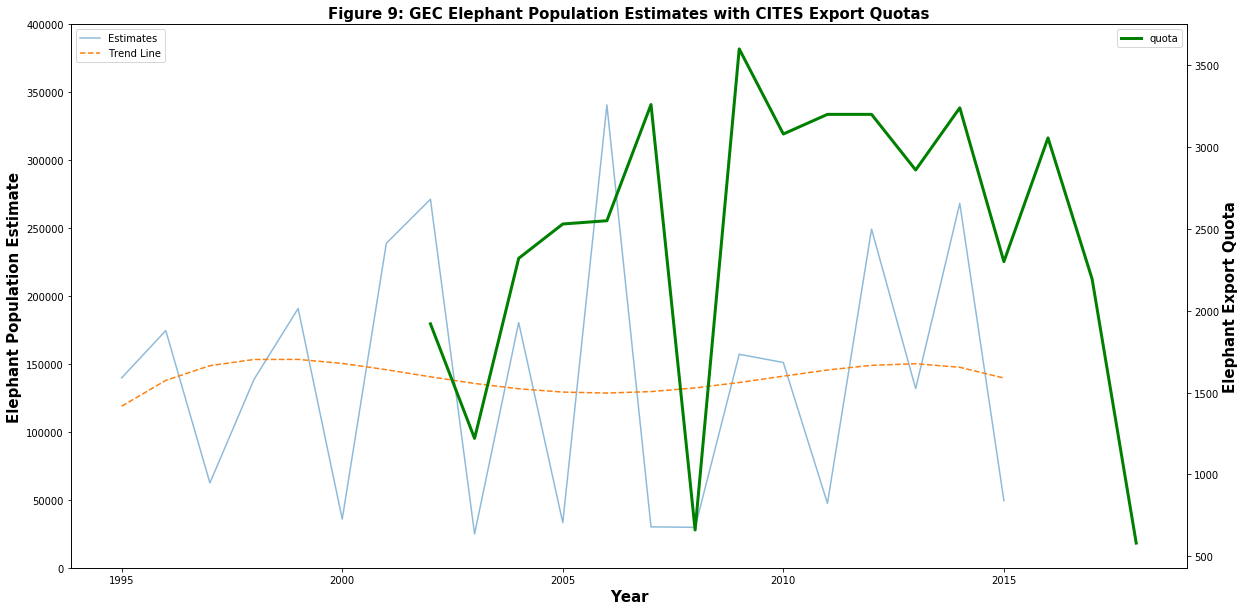

In [43]:
#plotting the yearly data estimates with a trend line
yearly_data=new_df.groupby('Year').sum()
yearly_data.values
x=np.arange(1995,2016)
z=np.polyfit(x,yearly_data.values,4)
coef=[]
for i in range(len(z)):
    coef.append(float(z[i]))
myarray=np.asarray(coef)
p=np.poly1d(myarray)
#Plotting the Total Elephant Population Over Time
fig, ax1 = plt.subplots()
ax1.plot(yearly_data.index,yearly_data.values,label="Estimates",alpha=.5)
ax1.plot(x,p(x),label="Trend Line",ls="--")
#ax1.rcParams["figure.figsize"] = (15,10)
ax1.set_ylim(0,400000)
#ax1.set_xticks(np.arange(1995,2016,1))
ax1.set_xlabel('Year',fontweight='bold',fontsize=15)    
ax1.set_ylabel('Elephant Population Estimate',fontsize=15,fontweight='bold')
ax1.legend(loc=2)
#Plotting the Elephant CITES Export Quota
ax2=ax1.twinx()
color='tab:green'
sum_year_df[sum_year_df['name']=='African Elephant'].plot(x='year',y='quota',
   ax=ax2,figsize=(20,10),fontsize=20,lw=3.0,color='green')
ax2.set_ylabel('Elephant Export Quota',fontsize=15,fontweight='bold')
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.legend(loc=1)
plt.title("Figure 9: GEC Elephant Population Estimates with CITES Export Quotas",fontsize=15, fontweight='bold')
plt.show()

In Figure 9 we can see the African Elephant population figures plotted with the African Elephant aggregate yearly CITES export quota. Taken together we can see an interesting trend: following spikes in the elephant population, countries increase their export quotas and very, perhaps taking advantage of potentially laxer regulatory scrutiny from CITES scientists. 


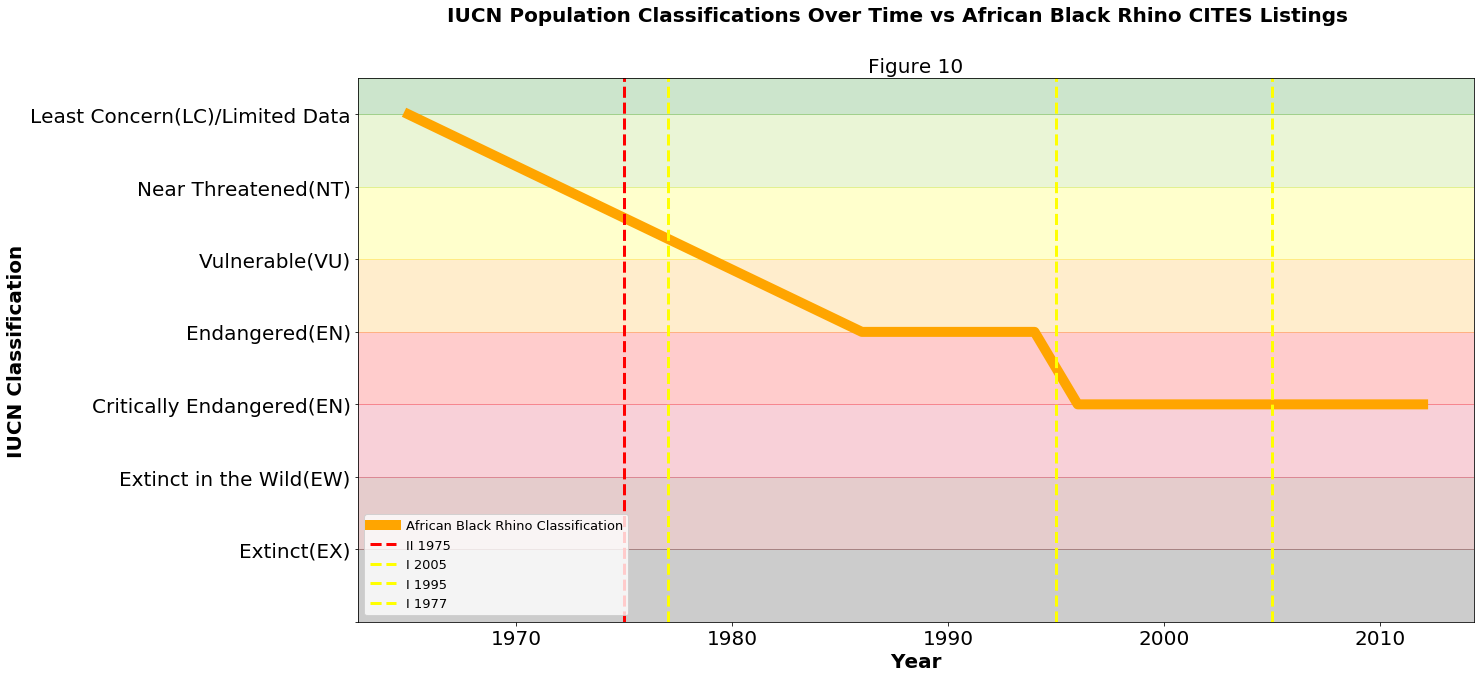

In [38]:
#Plotting the ICUN Population Classifications Overtime 
subset=species_class_df[['name','Year','Numerical Code']]
fig,ax=plt.subplots()
names=['African Elephant','African Black Rhino','African White Rhino']
subset[subset['name']=='Diceros bicornis'].plot(x='Year',y='Numerical Code',ax=ax,figsize=(20,10),
                            title='Figure 1',legend=True,fontsize=20,lw=10.0,color='orange',label='African Black Rhino Classification')
fig.suptitle('IUCN Population Classifications Over Time vs African Black Rhino CITES Listings'
             , fontsize=20, fontweight='bold')
ax.set_title('Figure 10',fontsize=20)
ax.set_ylabel('IUCN Classification',fontweight='bold',fontsize=20)
ax.set_xlabel('Year',fontweight='bold',fontsize=20)
labels=['','Extinct(EX)','Extinct in the Wild(EW)','Critically Endangered(EN)'
        ,'Endangered(EN)','Vulnerable(VU)','Near Threatened(NT)','Least Concern(LC)/Limited Data']
plt.ylim(ymax=7.5,ymin=1.0)
plt.yticks(np.arange(0,7.5,1),labels)
#Creating the Green to Red Scale background for the graph
plt.axhspan(0,1.0,alpha=0.2,color='black')
plt.axhspan(1.0,2.0,alpha=0.2,color='maroon')
plt.axhspan(2.0,3.0,alpha=0.2,color='crimson')
plt.axhspan(3.0,4.0,alpha=0.2,color='red')
plt.axhspan(4.0,5.0,alpha=0.2,color='orange')
plt.axhspan(5.0,6.0,alpha=0.2,color='yellow')
plt.axhspan(6.0,7.0,alpha=0.2,color='yellowgreen')
plt.axhspan(7.0,7.5,alpha=0.2,color='green')

#Plotting the Introduction of Black Rhino Cites Listings
for i in range(listing_total):
    if listing_subset.index[i]=='African Black Rhino':
        if listing_subset.index[i]=='African Black Rhino':
            if str(listing_subset['appendix'][i]) == "I":
                ax=plt.axvline(x=listing_subset['year'][i], 
                ymin=0,ymax=10,color='yellow', linestyle='--',linewidth=3,
                label=(str(listing_subset['appendix'][i])+" "+(str(listing_subset['year'][i])+' '+str(listing_subset['country'][i])[0:14])))
            elif str(listing_subset['appendix'][i]) == "II" or "III":
                ax=plt.axvline(x=listing_subset['year'][i], 
                ymin=0,ymax=10,color='red', linestyle='--',linewidth=3,
                label=(str(listing_subset['appendix'][i])+" "+(str(listing_subset['year'][i])+' '+str(listing_subset['country'][i])[0:14])))
ax=plt.legend(fontsize=13,loc=3)
plt.show()

In figure 10 we see the rather negligible effect that listing the African Black Rhino in the CITES appendices had on the population classification over time. 

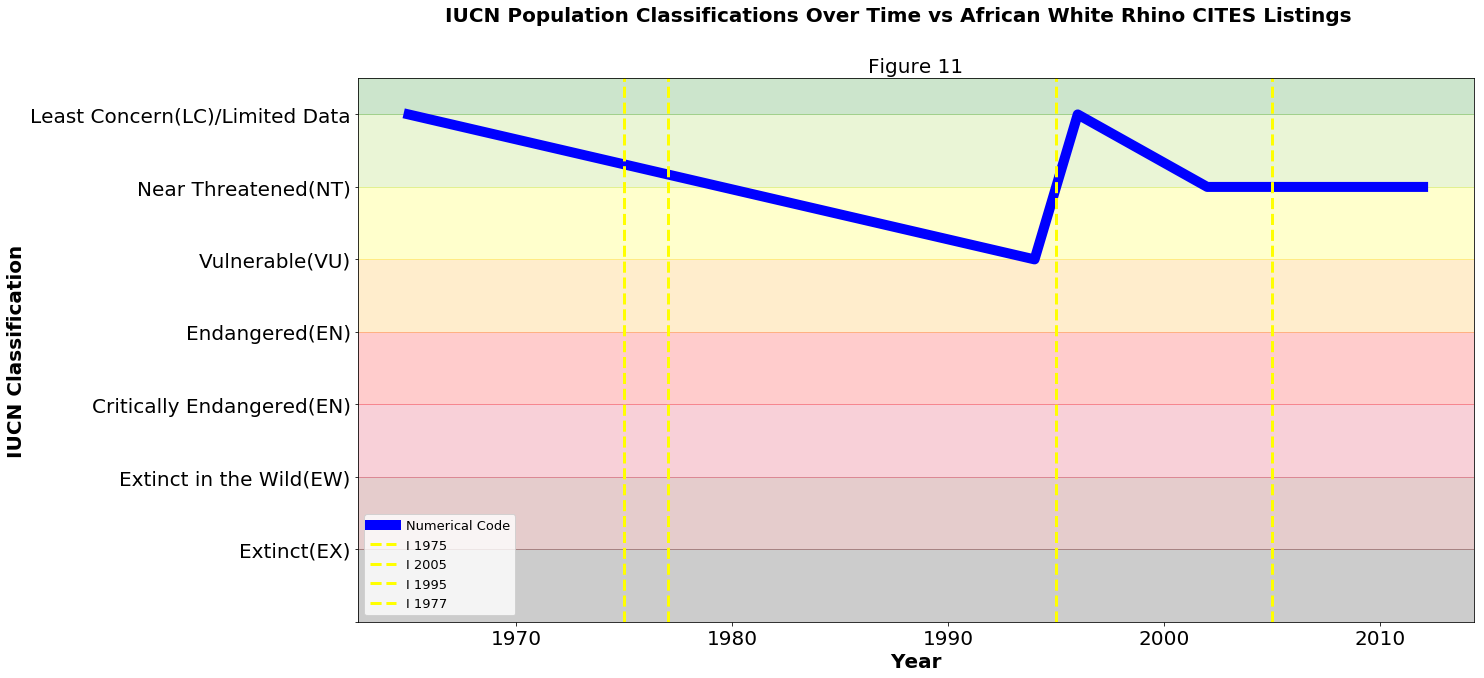

In [39]:
#Plotting the ICUN Population Classifications Overtime 
subset=species_class_df[['name','Year','Numerical Code']]
fig,ax=plt.subplots()
names=['African Elephant','African Black Rhino','African White Rhino']
subset[subset['name']=='Ceratotherium simum'].plot(x='Year',y='Numerical Code',ax=ax,figsize=(20,10),
                            title='Figure 1',legend=True,fontsize=20,lw=10.0,color='blue')
fig.suptitle('IUCN Population Classifications Over Time vs African White Rhino CITES Listings'
             , fontsize=20, fontweight='bold')
ax.set_title('Figure 11',fontsize=20)
ax.set_ylabel('IUCN Classification',fontweight='bold',fontsize=20)
ax.set_xlabel('Year',fontweight='bold',fontsize=20)
labels=['','Extinct(EX)','Extinct in the Wild(EW)','Critically Endangered(EN)'
        ,'Endangered(EN)','Vulnerable(VU)','Near Threatened(NT)','Least Concern(LC)/Limited Data']
plt.ylim(ymax=7.5,ymin=1.0)
plt.yticks(np.arange(0,7.5,1),labels)
#Creating the Green to Red Scale background for the graph
plt.axhspan(0,1.0,alpha=0.2,color='black')
plt.axhspan(1.0,2.0,alpha=0.2,color='maroon')
plt.axhspan(2.0,3.0,alpha=0.2,color='crimson')
plt.axhspan(3.0,4.0,alpha=0.2,color='red')
plt.axhspan(4.0,5.0,alpha=0.2,color='orange')
plt.axhspan(5.0,6.0,alpha=0.2,color='yellow')
plt.axhspan(6.0,7.0,alpha=0.2,color='yellowgreen')
plt.axhspan(7.0,7.5,alpha=0.2,color='green')

#Plotting the Introduction of White Rhino Cites Listings
for i in range(listing_total):
    if listing_subset.index[i]=='African White Rhino':
        if str(listing_subset['appendix'][i]) == "I":
            ax=plt.axvline(x=listing_subset['year'][i], 
            ymin=0,ymax=10,color='yellow', linestyle='--',linewidth=3,
            label=(str(listing_subset['appendix'][i])+" "+(str(listing_subset['year'][i])+' '+str(listing_subset['country'][i])[0:14])))
        elif str(listing_subset['appendix'][i]) == "II" or "III":
            ax=plt.axvline(x=listing_subset['year'][i], 
            ymin=0,ymax=10,color='red', linestyle='--',linewidth=3,
            label=(str(listing_subset['appendix'][i])+" "+(str(listing_subset['year'][i])+' '+str(listing_subset['country'][i])[0:14])))
ax=plt.legend(fontsize=13,loc=3)
plt.show()

In Figure 11 we can see perhaps that the White Rhino has a more favorable population response to being place in the CITES appendices. However, the White Rhino Population (apart from the Northern White Rhino) have not suffered from poaching as much as the Black Rhino.

### Part 3: Threats

In [40]:
#Using the IUCN Redlist API, reading in the JSON files for the species Threats
resp7 = requests.get('http://apiv3.iucnredlist.org/api/v3/threats/species/name/Loxodonta africana?token='+iucnkey)
elephant_threats=resp7.json()
resp8 = requests.get('http://apiv3.iucnredlist.org/api/v3/threats/species/name/Diceros bicornis?token='+iucnkey)
blrhino_threats=resp8.json()
resp9 = requests.get('http://apiv3.iucnredlist.org/api/v3/threats/species/name/Ceratotherium simum?token='+iucnkey)
whrhino_threats=resp9.json()

In [41]:
#creating the dataframe for the elephant threats
ele_threat=pd.DataFrame(elephant_threats['result'])
ele_threat['Name']=elephant_threats['name']
score_list=[]
for i in range(len(ele_threat['score'])):
    score=int(ele_threat['score'][i][-1])
    score_list.append(score)
ele_threat['score_num']=score_list
common_name=[]
for j in range(len(ele_threat['Name'])):
    common='African Elephant'
    common_name.append(common)
ele_threat['common_name']=common_name

In [42]:
#creating the dataframe for the black rhino threats
blrhino_threat=pd.DataFrame(blrhino_threats['result'])
blrhino_threat['Name']=blrhino_threats['name']
score_list=[]
for i in range(len(blrhino_threat['score'])):
    score=int(blrhino_threat['score'][i][-1])
    score_list.append(score)
blrhino_threat['score_num']=score_list
common_name=[]
for j in range(len(blrhino_threat['Name'])):
    common='African Black Rhino'
    common_name.append(common)
blrhino_threat['common_name']=common_name

In [43]:
#creating the dataframe for the white rhino threats
whrhino_threat=pd.DataFrame(whrhino_threats['result'])
whrhino_threat['Name']=whrhino_threats['name']
score_list=[]
for i in range(len(whrhino_threat['score'])):
    score=int(whrhino_threat['score'][i][-1])
    score_list.append(score)
whrhino_threat['score_num']=score_list
common_name=[]
for j in range(len(whrhino_threat['Name'])):
    common='African White Rhino'
    common_name.append(common)
whrhino_threat['common_name']=common_name


In [44]:
#creating a combined data frame
frames=[ele_threat,blrhino_threat,whrhino_threat]
species_threats=pd.concat(frames)

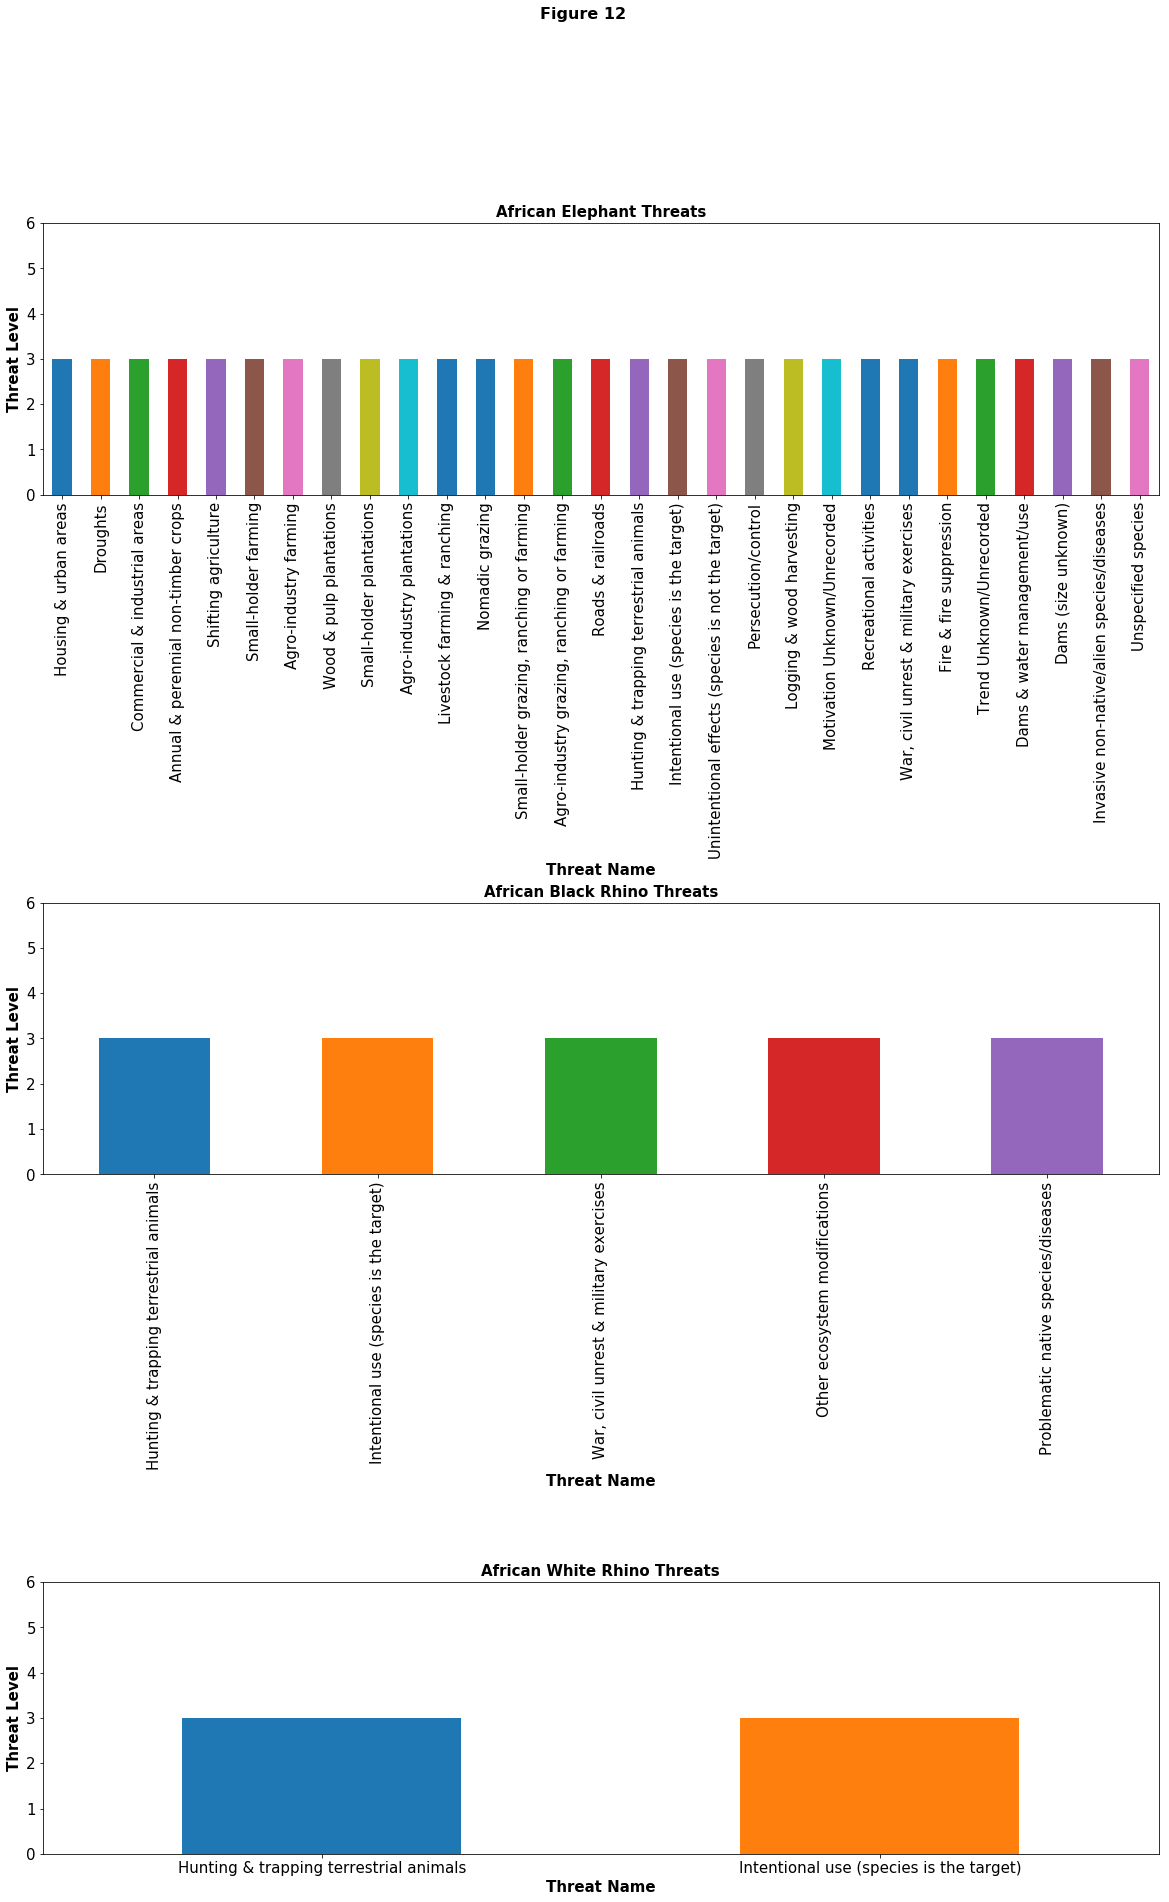

In [64]:
#Plotting all the threats
fig, (ax1,ax2,ax3)=plt.subplots(nrows=3, ncols=1)
fig.suptitle('Figure 12',fontsize=16, fontweight='bold')
species_threats[species_threats['common_name']=='African Elephant'].plot(x='title',
                    y='score_num',ax=ax1,kind='bar',figsize=(20,30),legend=False)
species_threats[species_threats['common_name']=='African Black Rhino'].plot(x='title',
                    y='score_num',ax=ax2,kind='bar',figsize=(20,30),legend=False)
species_threats[species_threats['common_name']=='African White Rhino'].plot(x='title',
                    y='score_num',ax=ax3,kind='bar',figsize=(20,30),legend=False)
ax1.set_ylim(0,6)
ax2.set_ylim(0,6)
ax3.set_ylim(0,6)

ax1.set_title("African Elephant Threats",fontsize=15,fontweight='bold')
ax2.set_title("African Black Rhino Threats",fontsize=15,fontweight='bold')
ax3.set_title("African White Rhino Threats",fontsize=15,fontweight='bold')

ax1.set_ylabel("Threat Level",fontsize=15,fontweight='bold')
ax2.set_ylabel("Threat Level",fontsize=15,fontweight='bold')
ax3.set_ylabel("Threat Level",fontsize=15,fontweight='bold')

ax1.set_xlabel("Threat Name",fontsize=15,fontweight='bold')
ax2.set_xlabel("Threat Name",fontsize=15,fontweight='bold')
ax3.set_xlabel("Threat Name",fontsize=15,fontweight='bold')

ax1.tick_params(axis='x',labelsize=15)
ax2.tick_params(axis='x',labelsize=15)
ax3.tick_params(axis='x',labelsize=15,rotation="default")

ax1.tick_params(axis='y',labelsize=15)
ax2.tick_params(axis='y',labelsize=15)
ax3.tick_params(axis='y',labelsize=15)


fig.subplots_adjust(hspace=1.5)
plt.show()

Figure 12 lists the current threats to the species in question, as reported by the IUCN RedList. We can see that Elephants clearly have the most threats, perhaps due to the diverse range of habitats they live in. While hunting and poaching threats are shared by Elephants and Rhinos, even when not targeted directly by poachers, Elephants are still threatened by agriculture, logging, and nomadic grazing. 

### Part 4: Geography

In [44]:
#Utilizing the IUCN RedList API to obtain the global distribution of species
#create dictionaries to create a new column for plotting
pres_dict={'Extant':1,'Extinct Post-1500':0,'Possibly Extinct':.5}
origin_dict={'Native':'green','Reintroduced':'turquoise','Introduced':'orchid'}
name_dict={'Loxodonta Africana':'African Elephant','Diceros bicornis':'African Black Rhino',
           'Ceratotherium simum':'African White Rhino'}
#create the black rhino DataFrame
resp5 = requests.get('http://apiv3.iucnredlist.org/api/v3/species/countries/name/Diceros bicornis?token='
                     +iucnkey)
blackrhinocountry = resp5.json()
blrhino_globe1=pd.DataFrame(data=blackrhinocountry)
blrhino_globe2=pd.DataFrame(data=blackrhinocountry['result'])
frames=[blrhino_globe1,blrhino_globe2]
blrhino_globe=pd.concat(frames,axis=1)
blrhino_globe = blrhino_globe.drop(['result','count'], axis=1)
pres_num=[]
for i in range(len(blrhino_globe)):
    num=pres_dict[blrhino_globe['presence'][i]]
    pres_num.append(num)
blrhino_globe['pres_num']=pres_num
origin_color=[]
for i in range(len(blrhino_globe)):
    color=origin_dict[blrhino_globe['origin'][i]]
    origin_color.append(color)
blrhino_globe['origin_color']=origin_color
common_name=[]
for i in range(len(blrhino_globe)):
    name=name_dict[blrhino_globe['name'][i]]
    common_name.append(name)
blrhino_globe['common_name']=common_name


In [45]:
#create the white rhino DataFrame 
resp6 = requests.get('http://apiv3.iucnredlist.org/api/v3/species/countries/name/Ceratotherium simum?token='+iucnkey)
whiterhinocountry = resp6.json()
whrhino_globe1=pd.DataFrame(data=whiterhinocountry)
whrhino_globe2=pd.DataFrame(data=whiterhinocountry['result'])
frames=[whrhino_globe1,whrhino_globe2]
whrhino_globe=pd.concat(frames,axis=1)
whrhino_globe = whrhino_globe.drop(['result','count'], axis=1)
pres_num=[] #create a presence number column for graphing
for i in range(len(whrhino_globe)): 
    num=pres_dict[whrhino_globe['presence'][i]]
    pres_num.append(num)
whrhino_globe['pres_num']=pres_num
origin_color=[]#create a color column for graphing
for i in range(len(whrhino_globe)):
    color=origin_dict[whrhino_globe['origin'][i]]
    origin_color.append(color)
whrhino_globe['origin_color']=origin_color
common_name=[]#create a common name column
for i in range(len(whrhino_globe)):
    name=name_dict[whrhino_globe['name'][i]]
    common_name.append(name)
whrhino_globe['common_name']=common_name

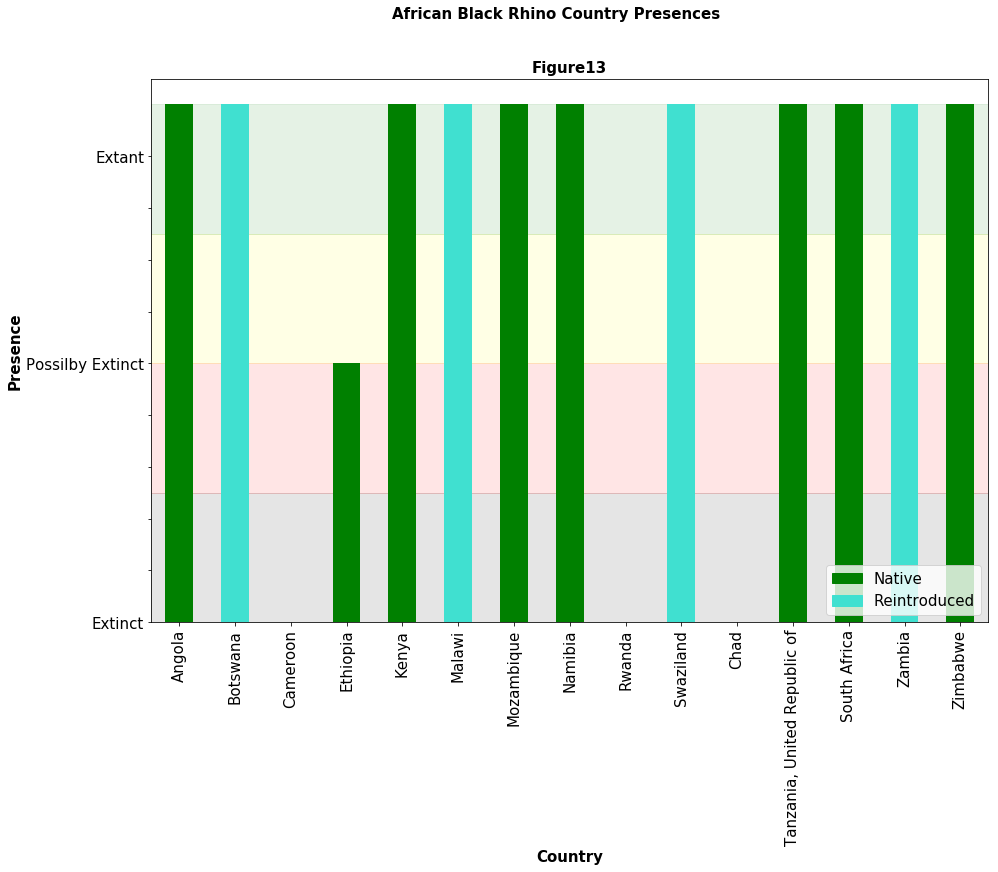

In [46]:
#creating a combined rhino DataFrame
newframes1=[blrhino_globe,whrhino_globe]
species_globe_df=pd.concat(newframes1)
globe_subset=species_globe_df[['common_name','country','origin','origin_color','presence','pres_num']]

#plotting the black rhino distribution dataframe
fig,ax=plt.subplots()
plt.rcParams["figure.figsize"] = [20,15]
plt.axhspan(0,.25,alpha=0.1,color='black')
plt.axhspan(.25,.5,alpha=0.1,color='red')
plt.axhspan(.5,.75,alpha=0.1,color='yellow')
plt.axhspan(.75,1.0,alpha=0.1,color='green')
globe_subset[globe_subset['common_name']=='African Black Rhino'].plot(x='country',y='pres_num',kind='bar',ax=ax,color=globe_subset['origin_color'])
ax.tick_params(axis='both',labelsize=15)
plt.legend(('Native','Reintroduced'),fontsize=15,loc=4)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('turquoise')
leg.legendHandles[0].set_alpha(1.0)
leg.legendHandles[1].set_alpha(1.0)
ax.set_ylabel("Presence",fontsize=15,fontweight='bold')
ax.set_xlabel("Country",fontsize=15,fontweight='bold')
ax.set_title("Figure13",fontsize=15,fontweight='bold')
fig.suptitle('African Black Rhino Country Presences',fontsize=15,fontweight='bold')
labels=['Extinct','','','','','Possilby Extinct','','','','Extant','']
plt.yticks(np.arange(0,1.0,.1),labels)

plt.show()


Figure 13 shows the countries the Black Rhino can be found living in. The graph shows that in three countries (Cameroon, Rwanda, and Chad) the Black Rhino has gone extinct, with populations in Ethiopia possibly extinct.

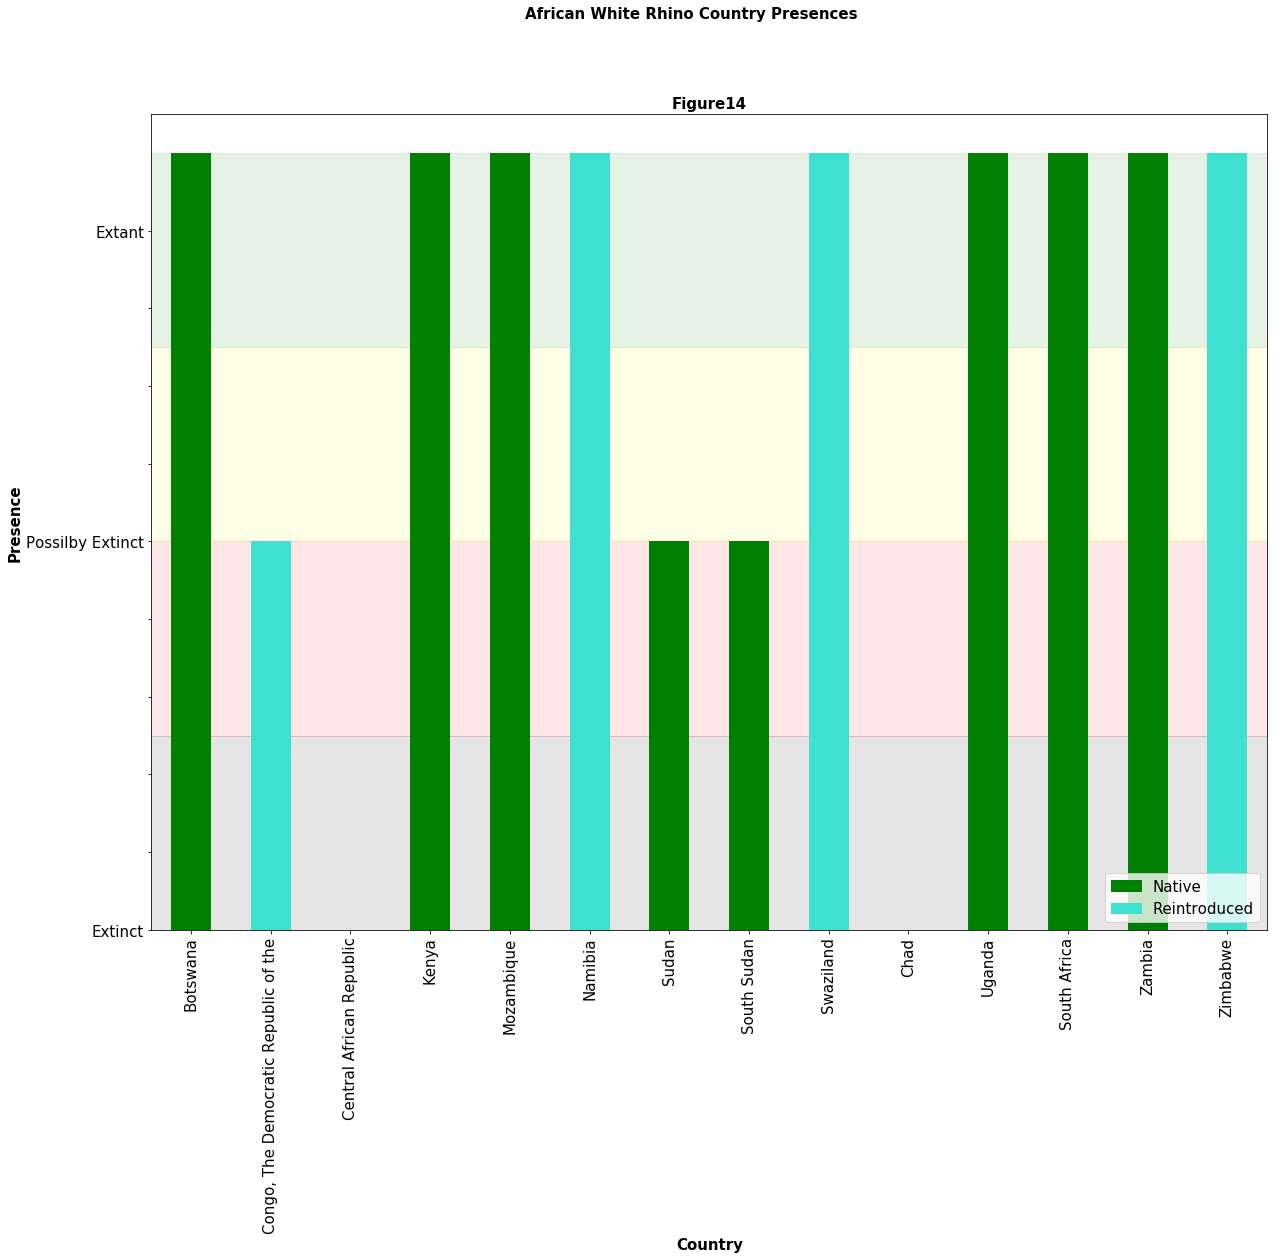

In [50]:
#plotting the white rhino distribution dataframe
fig,ax=plt.subplots()
plt.rcParams["figure.figsize"] = [20,15]
plt.axhspan(0,.25,alpha=0.1,color='black')
plt.axhspan(.25,.5,alpha=0.1,color='red')
plt.axhspan(.5,.75,alpha=0.1,color='yellow')
plt.axhspan(.75,1.0,alpha=0.1,color='green')
globe_subset[globe_subset['common_name']=='African White Rhino'].plot(x='country',y='pres_num',kind='bar',ax=ax,color=globe_subset['origin_color'])
ax.tick_params(axis='both',labelsize=15)
plt.legend(('Native','Reintroduced'),fontsize=15,loc=4)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('turquoise')
leg.legendHandles[0].set_alpha(1.0)
leg.legendHandles[1].set_alpha(1.0)
ax.set_ylabel("Presence",fontsize=15,fontweight='bold')
ax.set_xlabel("Country",fontsize=15,fontweight='bold')
ax.set_title("Figure14",fontsize=15,fontweight='bold')
fig.suptitle('African White Rhino Country Presences',fontsize=15,fontweight='bold')
labels=['Extinct','','','','','Possilby Extinct','','','','Extant','']
plt.yticks(np.arange(0,1.0,.1),labels)

plt.show()

Figure 14 shows the countires the African White Rhino can be found in. The graph shows that in Chad the White Rhino has gone extinct, with White Rhino populations in other North African countries like Sudan and South Sudan not far behind. In fact, the last Male Northern White Rhino died on March 21st of this year. 

In [47]:
#Utilizing the Elephant Atlas API to draw the Elephant distribution
resp_1=requests.get('https://elephant-atlas.org/api/v1/countries')
newdata=resp_1.json()
resp_2=requests.get('https://elephant-atlas.org/api/v1/strata')
newdata_1=resp_2.json()
resp_3=requests.get('https://elephant-atlas.org/api/v1/flights')
newdata_2=resp_3.json()

(-15.253578760351449, 51.01176750916325, -50.58103895536349, 28.59776688961029)

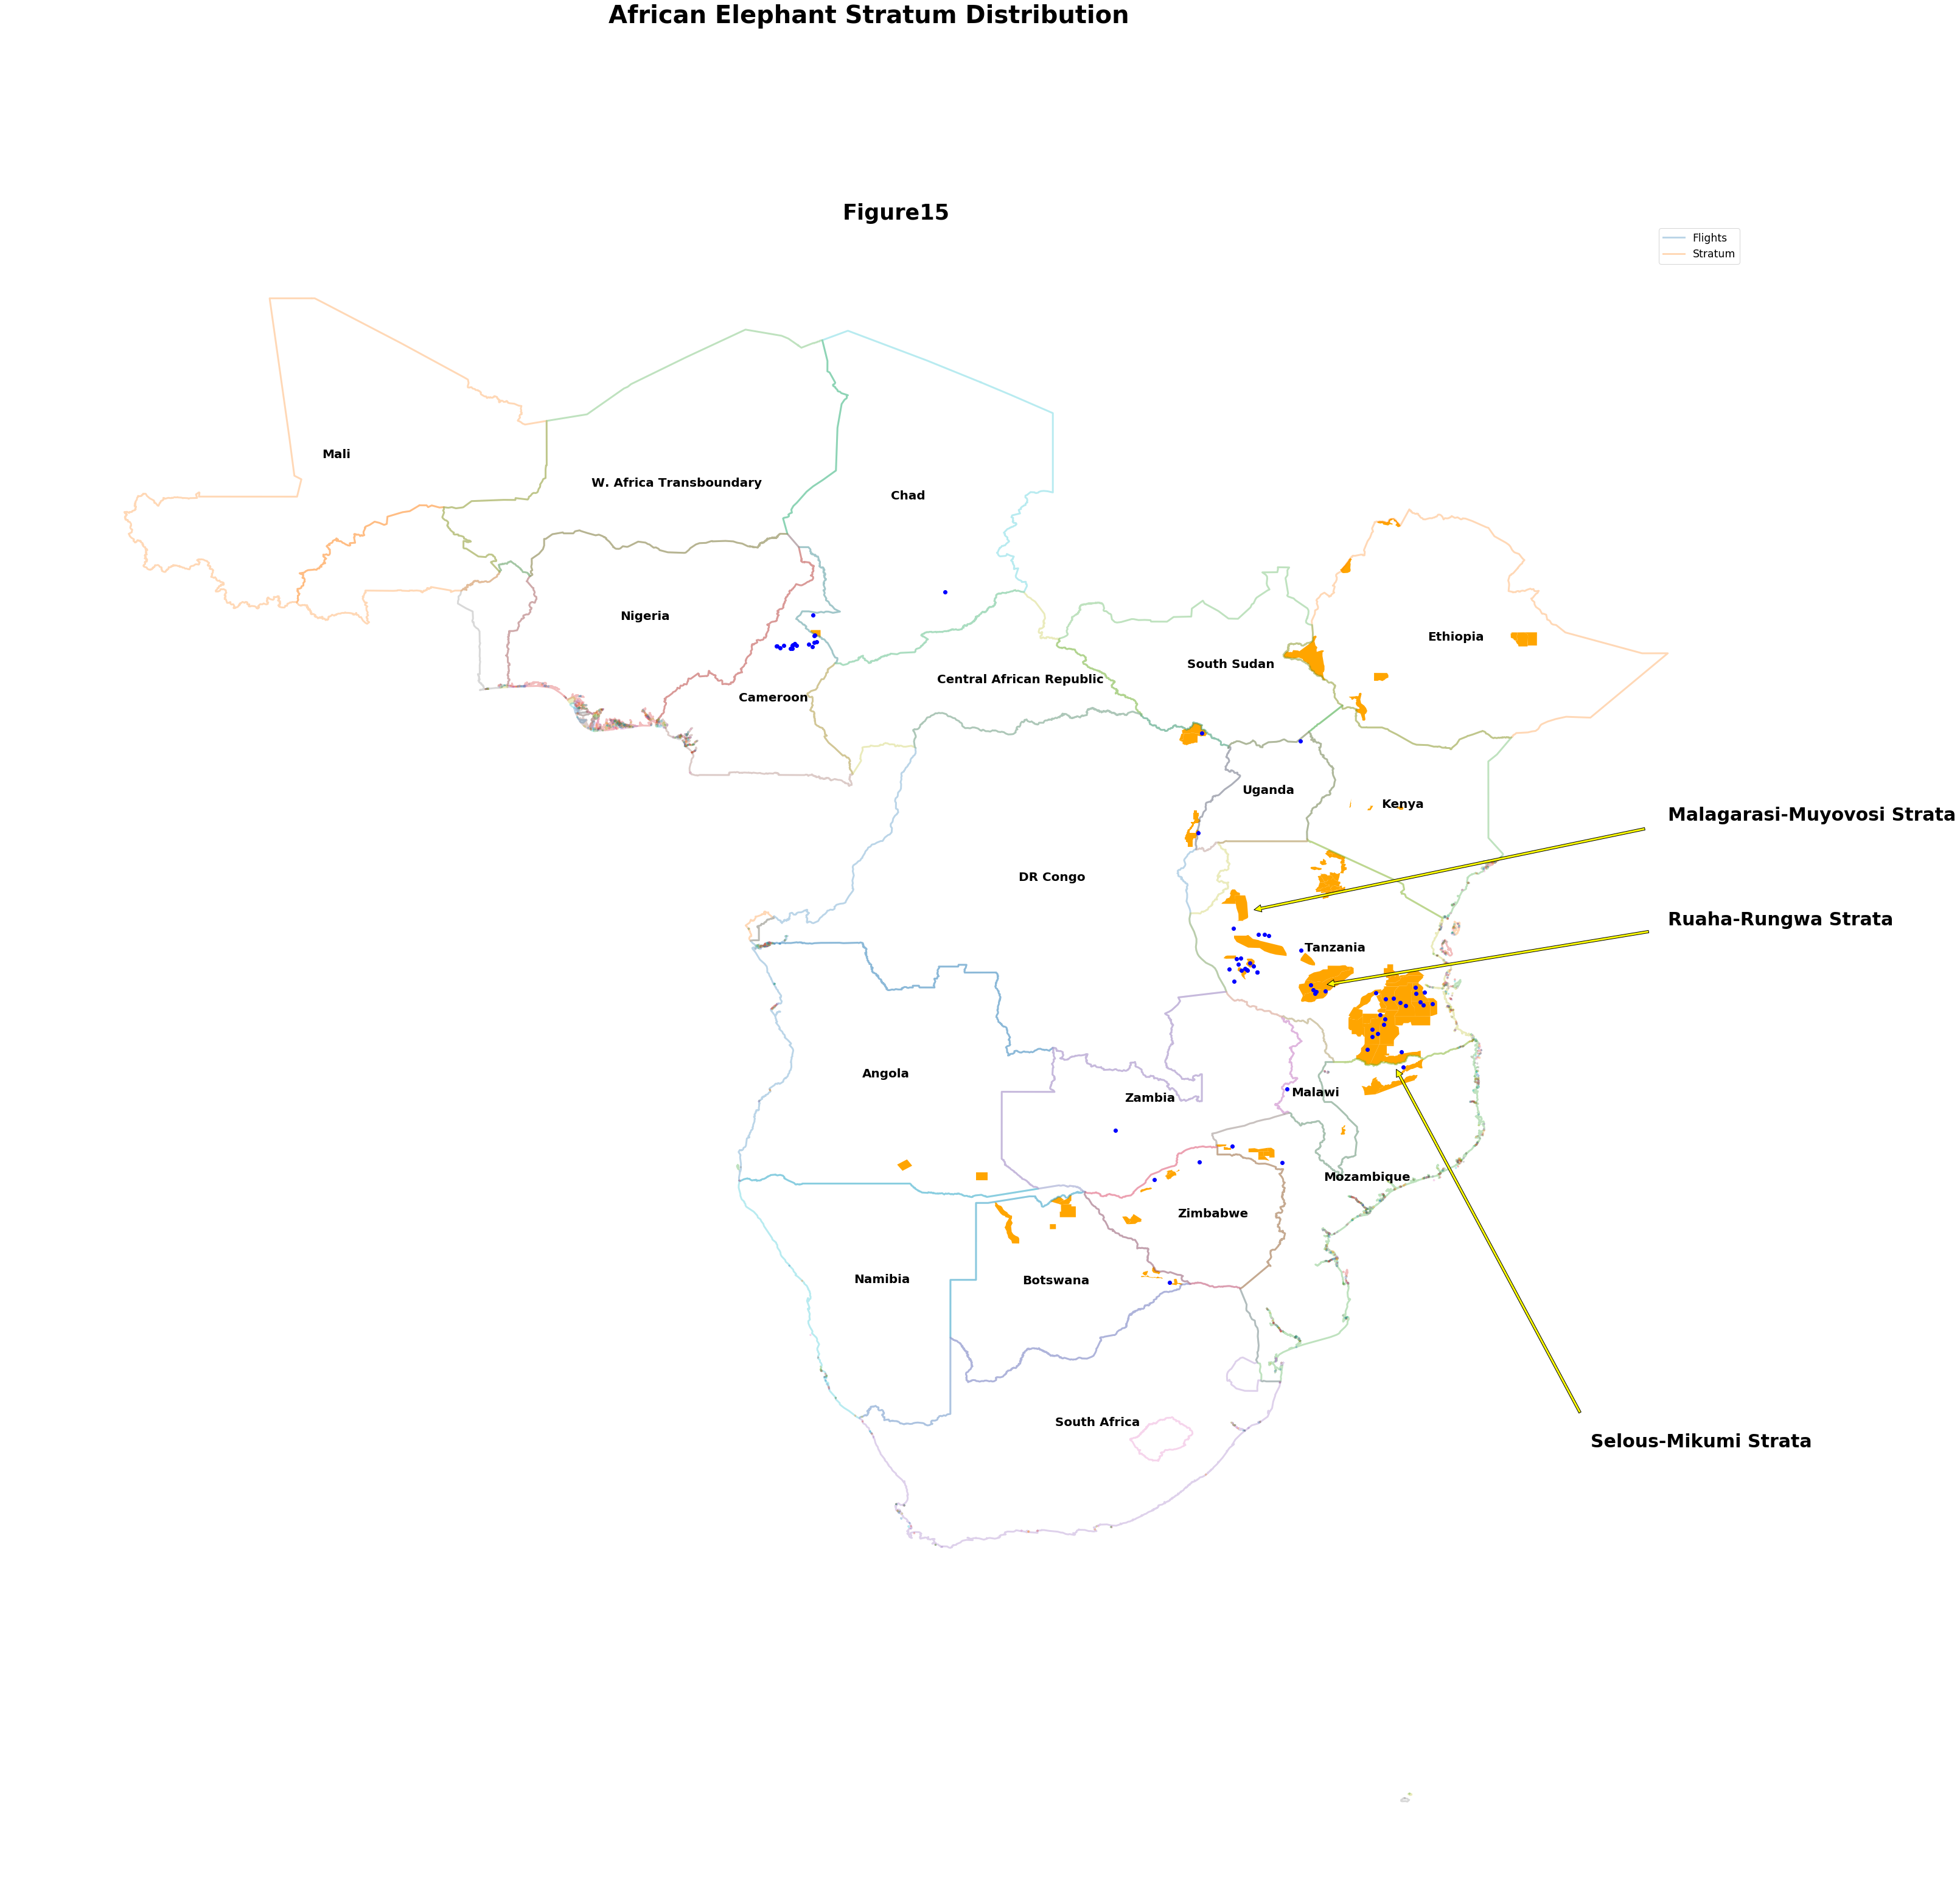

In [49]:
fig,ax=plt.subplots()
for h in range(len(newdata)):#Plots the outlines of African Countries
    for i in range(len(newdata[h]['country_boundary']['coordinates'])):
        for j in range(len(newdata[h]['country_boundary']['coordinates'][i])):
            coord=newdata[h]['country_boundary']['coordinates'][i][j]
            xs,ys=zip(*coord)
            #plt.plot(xs,ys)
            ax.plot(xs,ys,linewidth=3,alpha=.3)
for l in range(len(newdata)):#plots the names of the countries
    coord=newdata[l]['centroid']['coordinates']
    x,y=coord
    plt.annotate(str(newdata[l]['name']),xy=(x-1,y),fontsize=20,fontweight='bold')    
for a in range(len(newdata_1)):#plots stratum of elephants
    if 'stratum_boundary' in newdata_1[a].keys():
        for b in range(len(newdata_1[a]['stratum_boundary']['coordinates'])):
            coord=newdata_1[a]['stratum_boundary']['coordinates'][b][b]
            x=[]
            y=[]
            for l in range(len(coord)):
                x.append(coord[l][0])
                y.append(coord[l][1])
            ax.fill(x,y,'orange',linestyle='-',lw=9)
for a in range(len(newdata_2)):#plots flights of elephants
    if 'centroid' in newdata_2[a].keys():
        coord=newdata_2[a]['centroid']['coordinates']
        x=coord[0]
        y=coord[1]
        plt.plot(x,y,'bo')

plt.rcParams["figure.figsize"] = [50,50]
ax.set_title("Figure15",fontsize=35,fontweight='bold')
fig.suptitle('African Elephant Stratum Distribution',fontsize=40,fontweight='bold')
ax.tick_params(axis='both',labelsize=30)
plt.annotate("Selous-Mikumi Strata",fontsize=30,fontweight='bold',xy=(37,-11),
             xycoords='data',xytext=(45,-30),arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.annotate("Ruaha-Rungwa Strata",fontsize=30,fontweight='bold',xy=(34,-8),
             xycoords='data',xytext=(48,-5),arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.annotate("Malagarasi-Muyovosi Strata",fontsize=30,fontweight='bold',xy=(31,-4.5),
             xycoords='data',xytext=(48,0),arrowprops=dict(facecolor='yellow', shrink=0.05))

plt.legend(["Flights","Stratum"],fontsize="xx-large",markerscale=10.0)
#remove bounding box
ax.axis('off')


Figure 15 shows a fragment of the African continent, the distribution of Elephant stratum of Elephants (shown in orange), and the location of some Elephant flights (shown in blue dots). The three of largest stratum are also labeled to the right of the graph. Some of the largest Elephant stratum are in Tanzania, this is because Tanzania has some of the largest game preserves on the continent, and the Tanzanian government has been actively trying to tackle the poaching epidemic in its county past 10 years. However, this government activity has arguably come too late, as 40 years of poching have seen almost 90% of Tanzanian elephants disappearing according to [CNN](https://www.cnn.com/2018/04/11/africa/tanzania-collaring-wwf-elephants/index.html). 

### Part 5: Conclusion

While the situation may be dire, hope should not be abandoned. Organizations and people exist organizations who are constantly innovating new ways to protect these species. For example, [Air Shepherd](http://airshepherd.org/) is utilizing drones to provide surveillance of Elephant and Rhinoceros populations and giving early poaching warnings to park rangers. 

Furthermore, while this project was able to collect compelling data describing the problems these animals are facing, it is worth noting that much of the in-depth population data either remains to be collected, or is not publically available. The issues obtaining accurate population data are due in part to the lack of capital in many of these African countries to perform routine in-depth surveys, and also due to the behaviors of these animals. Many of these animals, like the African Elephant have populations that reside in dense forests for a majority of their life, making it difficult for aerial surveys (the most common kind of population survey) to capture accurate population figures. Hopefully, as these survey methods become cheaper and more effective (perhaps as drone technology improves), more accurate population figures can be collected and analyzed. 

Biodiversity is the world's shared heritage. If humanity became more conscious of the plight of African Elephants and Rhinoceroses, these alarming trends could be potentially reversed. The world need not witness another extinction like the Northern White Rhinos in the future.